# LENDING CLUB CASE STUDY 
## Saiyana Ramisetty

## Case study brief:
Lending Club is a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, it makes a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.
 
The goal of this analysis is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

## Business Objective:
Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

**Outcome of the Analysis**: The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

### Importing libraries needed for Analysis:

In [1]:
import numpy as np
import pandas as pd
import re
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from matplotlib import rcParams
from scipy import stats

### Loading the previous years (2007-2011) Loans Data:

In [2]:
# Path variable to hold the specific path of the data
path_var = '' # Replace with correct path variable

# Loading dataset
loans_data = pd.read_csv(path_var + 'loan.csv', encoding = 'ISO-8859-1')
loans_data.head()

/Users/saiyanaramisetty/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Understanding the dataset and it's attributes:

In [3]:
loans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
loans_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [5]:
loans_data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

### Data Cleaning:
The dataset contains 111 columns/attributes, some of which need not be necessary for the analysis. Cleaning the dataset to meet the requirement for our analysis. 

- There are so many unneccessary columns in the dataset. Removing the unwanted attributes and retaining the attributes useful for analysis. Few of the attributes may not be calculated at the time of loan approval process, dropping off such attributes as well.

In [6]:
# List of columns needed for analysis
cols = ['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'last_pymnt_amnt', 'pub_rec', 'pub_rec_bankruptcies']

# Extracting only attributes needed from the total dataset
loans_data = loans_data[cols]
loans_data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'last_pymnt_amnt', 'pub_rec', 'pub_rec_bankruptcies'],
      dtype='object')

- Updating the data type of few attributes which fall under the category of float values.

In [7]:
# List of columns which should be of type float
cols = ['loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment', 'annual_inc', 'dti', 
          'revol_bal', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt']

# Changing the data type to float
loans_data[cols] = loans_data[cols].astype(np.float)

# Rounding of the decimal values to 2 places
loans_data[cols] = loans_data[cols].apply(lambda x : round(x, 2))

loans_data[cols].head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
0,5000.0,5000.0,4975.0,162.87,24000.0,27.65,13648.0,9.0,5863.16,5833.84,5000.00,863.16,171.62
1,2500.0,2500.0,2500.0,59.83,30000.0,1.00,1687.0,4.0,1008.71,1008.71,456.46,435.17,119.66
2,2400.0,2400.0,2400.0,84.33,12252.0,8.72,2956.0,10.0,3005.67,3005.67,2400.00,605.67,649.91
3,10000.0,10000.0,10000.0,339.31,49200.0,20.00,5598.0,37.0,12231.89,12231.89,10000.00,2214.92,357.48
4,3000.0,3000.0,3000.0,67.79,80000.0,17.94,27783.0,38.0,3513.33,3513.33,2475.94,1037.39,67.79


- Converting the string attributes to their respectful data types to obtain meaning from the attributes.

In [8]:
# Removing the 'months' substring from the term attribute and changing the data type to integer
loans_data['term'] = loans_data['term'].str.replace(' months', '')
loans_data['term'] = loans_data['term'].astype(int)

# Interest Rate and revol_util are percentages in the form of string, removing the '%' symbol and changing the data type to float                                
loans_data['int_rate'] = loans_data['int_rate'].str.rsplit('%').str[0].astype('float')
loans_data['revol_util'] = loans_data['revol_util'].str.strip('%').astype('float')

cols = ['term', 'int_rate', 'revol_util']
loans_data[cols].head()

,term,int_rate,revol_util
0,36,10.65,83.7
1,60,15.27,9.4
2,36,15.96,98.5
3,36,13.49,21.0
4,60,12.69,53.9


- Employee length : Number of years of the employment of the borrower takes values from 0 to 10. Where '<1 year' means that the work experience of the borrower is less than an year (i.e, 0), whereas '10+ years' mean that the work experience of the borrower is greater than or equal to 10 years.

In [9]:
# Removing alphabet characters from emp_length (i.e, 'years',...)
loans_data['emp_length'] = loans_data['emp_length'].apply(lambda row : str(row))
loans_data['emp_length'] = loans_data['emp_length'].str.replace(' ', '')
loans_data['emp_length'] = loans_data['emp_length'].apply(lambda row : re.sub(r'[a-z]+', '', row))

# '<1' mean 0 years of experience & '10+' mean 10 or more years of experience, which is represented as 10
loans_data['emp_length'] = loans_data['emp_length'].str.replace('+', '')
loans_data['emp_length'] = loans_data['emp_length'].str.replace('<1', '0')

# Converting the term attribute to numeric type after preprocessing
loans_data['emp_length'] = pd.to_numeric(loans_data['emp_length'], errors = 'ignore')

loans_data['emp_length'].head()

0    10.0
1     0.0
2    10.0
3    10.0
4     1.0
Name: emp_length, dtype: float64

- To maintain consitency and to avoid duplicate values converting the string/categorical values to upper case.

In [10]:
# Checking if the type if of 'object', that is non numeric and converting the string to upper case
loans_data = loans_data.apply(lambda x : x.str.upper() if x.dtype == 'object' else x)

loans_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,pub_rec,pub_rec_bankruptcies
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,NaN,...,13648.0,83.7,9.0,5863.16,5833.84,5000.00,863.16,171.62,0,0.0
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,RYDER,...,1687.0,9.4,4.0,1008.71,1008.71,456.46,435.17,119.66,0,0.0
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,NaN,...,2956.0,98.5,10.0,3005.67,3005.67,2400.00,605.67,649.91,0,0.0
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,5598.0,21.0,37.0,12231.89,12231.89,10000.00,2214.92,357.48,0,0.0
4,1075358,3000.0,3000.0,3000.0,60,12.69,67.79,B,B5,UNIVERSITY MEDICAL GROUP,...,27783.0,53.9,38.0,3513.33,3513.33,2475.94,1037.39,67.79,0,0.0


- Dropping off the rows of some attributes which are irrelevant in the analysis.

When a person applies for a loan, there are two types of decisions that could be taken by the company:

*Loan accepted*: If the company approves the loan, there are 3 possible scenarios described below:
 - **Fully paid**: Applicant has fully paid the loan (the principal and the interest rate)
 - **Current**: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'. - **This category is unwanted for our analysis.**
 - **Charged-off**: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan
 
*Loan rejected*: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected.

In [11]:
# 'loan_status' attribute has three unique values - FULLY PAID, CURRENT, CHARGED OFF. We don not require CURRENT value entries.
loans_data = loans_data[ ~ (loans_data['loan_status'] == 'CURRENT')]
loans_data['loan_status'].value_counts()

FULLY PAID     32950
CHARGED OFF     5627
Name: loan_status, dtype: int64

- Loan issue date : 'issue_d' attribute is a DateTime attribute, but the data is stored in the form of a string. Converting the value to a Date object.

In [12]:
loans_data['issue_d'] = loans_data['issue_d'].apply(lambda x : pd.to_datetime(datetime.strptime(x, '%b-%y')))

loans_data['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
5   2011-12-01
Name: issue_d, dtype: datetime64[ns]

### Handling Missing values:
Checking for any missing values/NaN in the dataset and imputing/dropping them accordingly to their relevance.

- Checking for the percentage of missing values in the dataset.

In [13]:
round(100 * (loans_data.isnull().sum() / len(loans_data)), 2)

id                      0.00
loan_amnt               0.00
funded_amnt             0.00
funded_amnt_inv         0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               6.19
emp_length              2.68
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
addr_state              0.00
dti                     0.00
delinq_2yrs             0.00
inq_last_6mths          0.00
open_acc                0.00
revol_bal               0.00
revol_util              0.13
total_acc               0.00
total_pymnt             0.00
total_pymnt_inv         0.00
total_rec_prncp         0.00
total_rec_int           0.00
last_pymnt_amnt         0.00
pub_rec                 0.00
pub_rec_bankruptcies    1.81
dtype: float64

We can see that the columns ['emp_title', 'emp_length', 'revol_util', 'pub_rec_bankruptcies'] have missing values with **less than 7%** of the total missing values.

There are no higher percentages (all are < 7%) of missing values in the attributes chosen for analysis. Thus deleting the rows which have missing values.

In [14]:
# Dropping all missing values
loans_data.dropna(how = 'any', inplace = True)

# Checking for missing values again - We have removed all the missing values
round(100 * (loans_data.isnull().sum() / len(loans_data)), 2)

id                      0.0
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_title               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
addr_state              0.0
dti                     0.0
delinq_2yrs             0.0
inq_last_6mths          0.0
open_acc                0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
total_pymnt             0.0
total_pymnt_inv         0.0
total_rec_prncp         0.0
total_rec_int           0.0
last_pymnt_amnt         0.0
pub_rec                 0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [15]:
# Remvoving rows with duplicate entry values if any.
loans_data = loans_data.drop_duplicates()

loans_data.shape

(35436, 32)

### Outlier Detection:
Understanding the ranges/quartiles of the numeric attributes and removing the outliers if there are any. Outlier Detection helps in understand the correct representation of the attribute.

- Checking for any attributes which have outliers and removing them to get most represented data for analysis.

In [16]:
# Getting quantiles of each numeric attribute in range of 10%
loans_data.quantile([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], numeric_only = True)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,...,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,pub_rec,pub_rec_bankruptcies
0.0,55742.0,500.0,500.0,0.0,36.0,5.42,16.08,0.0,4000.0,0.00,...,0.0,0.0,2.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0
0.1,435051.5,3200.0,3200.0,3000.0,36.0,7.14,100.64,0.0,30000.0,4.21,...,1178.0,8.9,9.0,3013.755,2674.830,2255.135,319.830,97.335,0.0,0.0
0.2,493612.0,5000.0,5000.0,4750.0,36.0,7.90,151.97,2.0,38004.0,7.12,...,2897.0,20.7,12.0,4817.380,4465.600,4000.000,544.060,182.010,0.0,0.0
0.3,547542.5,6000.0,6000.0,5975.0,36.0,9.99,187.69,2.0,45000.0,9.43,...,4709.0,30.9,15.0,6242.340,5936.015,5000.000,768.600,273.135,0.0,0.0
0.4,605061.0,8000.0,7750.0,7200.0,36.0,10.99,231.68,3.0,51000.0,11.52,...,6661.0,40.6,18.0,7857.290,7459.380,6401.580,1020.620,385.190,0.0,0.0
0.5,660890.5,10000.0,9600.0,9000.0,36.0,11.86,280.28,4.0,60000.0,13.50,...,8922.5,49.7,21.0,9847.340,9378.600,8000.000,1329.040,599.500,0.0,0.0
0.6,731651.0,11500.0,11000.0,10250.0,36.0,12.87,330.44,6.0,66000.0,15.44,...,11534.0,58.7,24.0,11897.640,11421.950,10000.000,1742.710,1220.350,0.0,0.0
0.7,796747.0,14000.0,13200.0,12500.0,36.0,13.85,388.78,7.0,76000.0,17.54,...,14865.5,67.9,27.0,14491.350,13965.745,12000.000,2324.905,2660.050,0.0,0.0
0.8,865483.0,16000.0,16000.0,15000.0,60.0,15.23,481.26,10.0,90000.0,19.79,...,19712.0,77.5,31.0,18050.130,17455.680,15000.000,3235.760,4793.900,0.0,0.0
0.9,1004118.5,21600.0,20000.0,20000.0,60.0,16.82,618.90,10.0,115000.0,22.36,...,29007.0,87.9,38.0,24297.290,23589.070,20000.000,4977.465,8662.350,0.0,0.0


From the above result we can observe that attributes ['int_rate', 'loan_amnt', 'installment'] have outliers at the higher side ie 90-100 quantile. And 'annual_inc' has outliers at the higher side ie 80-100 quantile. Removing the entries which fall under this quantile.

In [17]:
# Getting the last 10% and 20% quantile and Filtering out the rows which fall under last_quantile
Q9 = loans_data.quantile(0.9)
Q8 = loans_data.quantile(0.8)

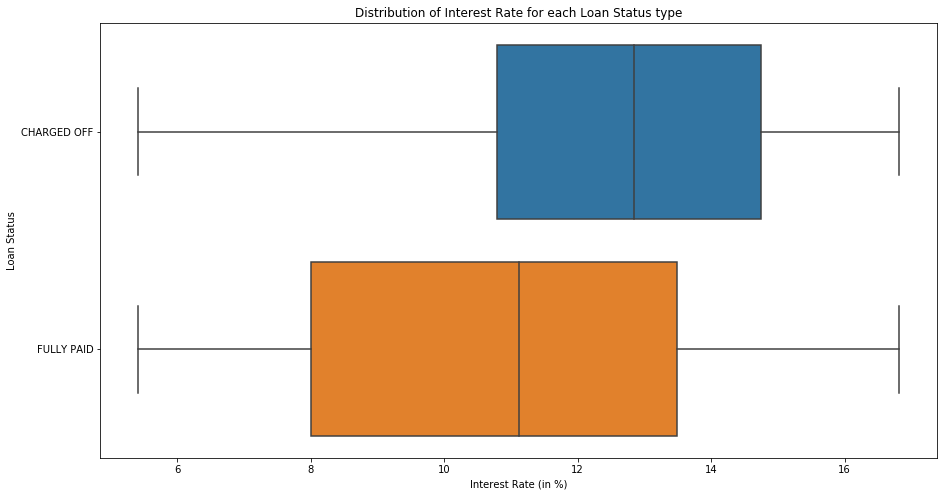

In [18]:
# Interest Rate - int_rate
loans_data = loans_data[loans_data['int_rate'] <= Q9['int_rate']]
plt.figure(figsize = (15,8))
sns.boxplot(x = loans_data['int_rate'], y = loans_data['loan_status'])
plt.title('Distribution of Interest Rate for each Loan Status type')
plt.xlabel('Interest Rate (in %)')
plt.ylabel('Loan Status')
plt.show()

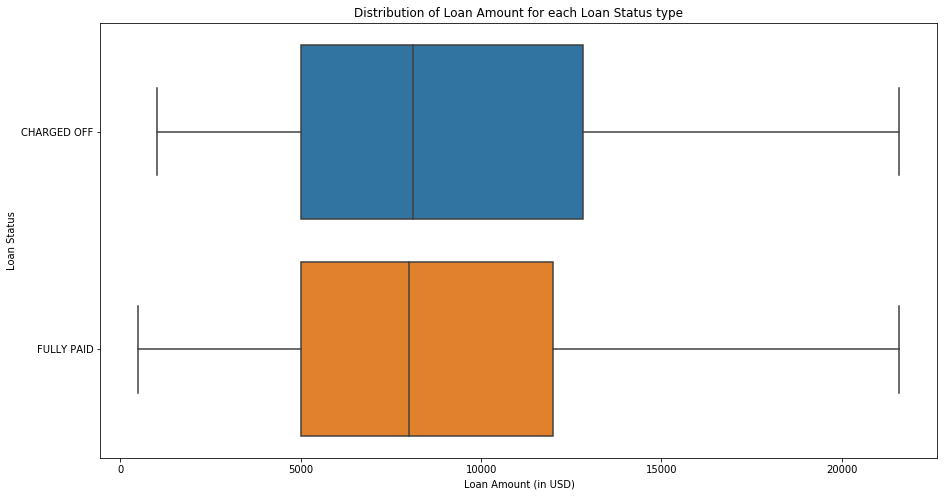

In [19]:
# Loan Amount - loan_amnt
loans_data = loans_data[loans_data['loan_amnt'] <= Q9['loan_amnt']]
plt.figure(figsize = (15,8))
sns.boxplot(x = loans_data['loan_amnt'], y = loans_data['loan_status'])
plt.title('Distribution of Loan Amount for each Loan Status type')
plt.xlabel('Loan Amount (in USD)')
plt.ylabel('Loan Status')
plt.show()

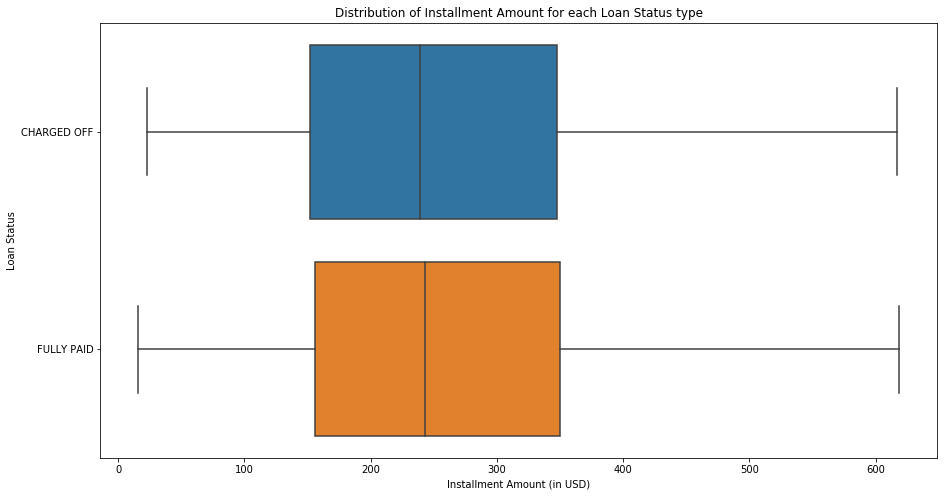

In [20]:
# Installment Amount - installment
loans_data = loans_data[loans_data['installment'] <= Q9['installment']]
plt.figure(figsize = (15,8))
sns.boxplot(x = loans_data['installment'], y = loans_data['loan_status'])
plt.title('Distribution of Installment Amount for each Loan Status type')
plt.xlabel('Installment Amount (in USD)')
plt.ylabel('Loan Status')
plt.show()

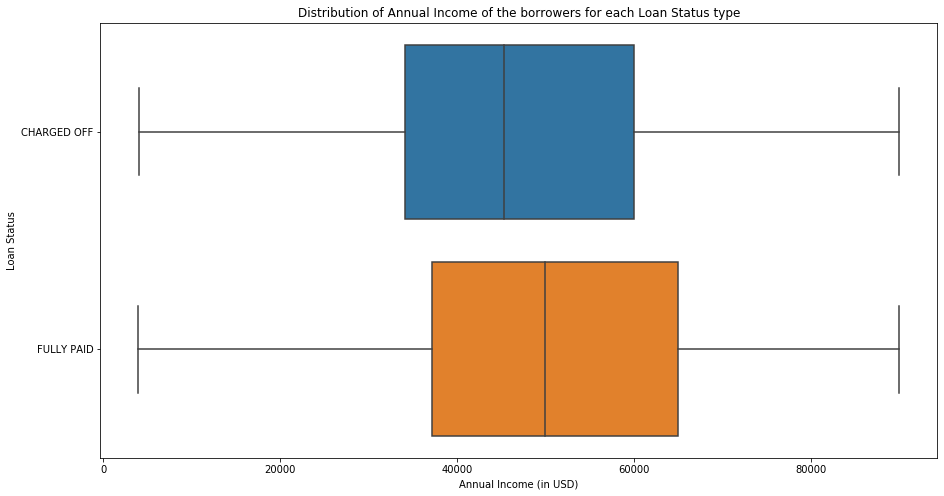

In [21]:
# Annual Income of the borrowers - annual_inc
loans_data = loans_data[loans_data['annual_inc'] <= Q8['annual_inc']]
plt.figure(figsize = (15,8))
sns.boxplot(x = loans_data['annual_inc'], y = loans_data['loan_status'])
plt.title('Distribution of Annual Income of the borrowers for each Loan Status type')
plt.xlabel('Annual Income (in USD)')
plt.ylabel('Loan Status')
plt.show()

In [22]:
# Getting quantiles of each numeric attribute in range of 10% - After we removed the outliers
loans_data.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], numeric_only=True)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,...,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,pub_rec,pub_rec_bankruptcies
0.0,55742.0,500.0,500.0,0.000,36.0,5.42,16.080,0.0,4000.0,0.000,...,0.0,0.0,2.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0
0.1,426365.8,3000.0,3000.0,2500.000,36.0,6.92,91.130,0.0,27600.0,4.220,...,965.8,8.4,8.0,2571.500,2291.848,2000.0,271.076,87.128,0.0,0.0
0.2,485092.6,4200.0,4000.0,4000.000,36.0,7.74,129.520,1.0,34500.0,7.256,...,2380.6,18.8,11.0,4092.540,3748.550,3300.0,459.174,162.458,0.0,0.0
0.3,534638.6,5000.0,5000.0,5000.000,36.0,9.32,163.570,2.0,40000.0,9.640,...,3868.4,28.4,14.0,5513.832,5216.248,4800.0,635.714,226.596,0.0,0.0
0.4,590279.4,6250.0,6000.0,6000.000,36.0,10.38,194.684,3.0,45000.0,11.820,...,5439.0,37.5,16.0,6661.108,6359.506,5650.0,824.316,315.924,0.0,0.0
0.5,643336.0,7950.0,7600.0,7200.000,36.0,11.14,231.100,4.0,50000.0,13.800,...,7204.0,46.6,19.0,8024.330,7669.690,7000.0,1038.030,429.690,0.0,0.0
0.6,712129.0,9445.0,9000.0,8745.092,36.0,11.99,272.950,5.0,55000.0,15.810,...,9252.0,55.3,21.0,9725.604,9327.310,8000.0,1295.452,824.968,0.0,0.0
0.7,780725.4,10000.0,10000.0,10000.000,36.0,13.11,318.820,7.0,60000.0,17.910,...,11705.6,64.4,24.0,11523.034,11132.740,10000.0,1648.898,1955.334,0.0,0.0
0.8,854107.8,12000.0,12000.0,12000.000,36.0,13.99,368.450,9.0,69500.0,20.140,...,15093.0,74.1,28.0,13751.748,13346.700,12000.0,2146.730,3504.172,0.0,0.0
0.9,999821.6,15000.0,15000.0,14750.000,60.0,15.27,449.320,10.0,78000.0,22.600,...,20889.0,85.2,34.0,17056.880,16594.766,14580.0,3004.648,6099.972,0.0,0.0


### Derived Attributes:
We can derive few sub attributes from the consumer and loan attributes in the Loans dataset which can be helpful for more detailed analysis.

- State Information of the borrowers is given in the dataset. From the state attribute we can derive to which U.S region the borrower belongs to.

United States of America has 4 regions - **North East, Mid West, South and West**. Taking the list of states which fall under their respective regions to derive a new attribute 'region'.

In [23]:
# List of states with their respective regions
north_east = ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA']
mid_west = ['IN', 'IL', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD']
south = ['DE', 'DC', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'OK', 'TX']
west = ['AZ', 'CO', 'ID', 'NM', 'MT', 'UT', 'NV', 'WY', 'AK', 'CA', 'HI', 'OR', 'WA']

# Extracting region from state information
def get_region_from_state(s):
    if s in north_east:
        return 'North_East'
    elif s in mid_west:
        return 'Mid_West'
    elif s in south:
        return 'South'
    elif s in west:
        return 'West'

loans_data['region'] = loans_data['addr_state'].apply(get_region_from_state)

cols = ['addr_state', 'region']
loans_data[cols].head()

,addr_state,region
1,GA,South
3,CA,West
5,AZ,West
6,NC,South
9,TX,South


- Loan issue date is given in the dataset. From the issue date attribute we can derive the month and year of the loan issue.

In [24]:
# Getting month and year from the 'issue_d' attribute
loans_data['year'] = loans_data['issue_d'].dt.year
loans_data['month'] = loans_data['issue_d'].dt.month

# Renaming the numeric representation of month to word
loans_data['month'] = loans_data['month'].apply(lambda x : calendar.month_abbr[x])

cols = ['issue_d', 'month', 'year']
loans_data[cols].head()

,issue_d,month,year
1,2011-12-01,Dec,2011
3,2011-12-01,Dec,2011
5,2011-12-01,Dec,2011
6,2011-12-01,Dec,2011
9,2011-12-01,Dec,2011


- Segmenting the continous attributes to bins for better analysis.

Binning the Debt To Income (dti) attribute:

In [25]:
loans_data['dti'].describe()

count    24139.000000
mean        13.647909
std          6.722280
min          0.000000
25%          8.505000
50%         13.800000
75%         19.000000
max         29.990000
Name: dti, dtype: float64

In [26]:
# Values are spread between 0 - 30, Binning them into 6 bins with a different of 5
loans_data['dti_bin'] = pd.cut(loans_data['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

cols = ['dti', 'dti_bin']
loans_data[cols].head()

,dti,dti_bin
1,1.00,0-5
3,20.00,15-20
5,11.20,10-15
6,23.51,20-25
9,18.08,15-20


Binning the Loan Amount (loan_amnt) attribute:

In [27]:
loans_data['loan_amnt'].describe()

count    24139.000000
mean      8431.029662
std       4611.315031
min        500.000000
25%       5000.000000
50%       7950.000000
75%      12000.000000
max      21600.000000
Name: loan_amnt, dtype: float64

In [28]:
# Values are spread between 0 - 25000, Binning them with a difference of 5000 each bin
loans_data['loan_amnt_bin'] = pd.cut(loans_data['loan_amnt'], [x for x in range(0, 26000, 5000)])

cols = ['loan_amnt', 'loan_amnt_bin']
loans_data[cols].head()

,loan_amnt,loan_amnt_bin
1,2500.0,"(0, 5000]"
3,10000.0,"(5000, 10000]"
5,5000.0,"(0, 5000]"
6,7000.0,"(5000, 10000]"
9,5375.0,"(5000, 10000]"


Binning the Interest Rate (int_rate) attribute:

In [29]:
loans_data['int_rate'].describe()

count    24139.000000
mean        11.114427
std          3.061372
min          5.420000
25%          8.320000
50%         11.140000
75%         13.490000
max         16.820000
Name: int_rate, dtype: float64

In [30]:
# Values are spread between 0 - 20, Binning them with a difference of 5 each bin
loans_data['int_rate_bin'] = pd.cut(loans_data['int_rate'], [0,5,10,15,20])

cols = ['int_rate', 'int_rate_bin']
loans_data[cols].head()

,int_rate,int_rate_bin
1,15.27,"(15, 20]"
3,13.49,"(10, 15]"
5,7.90,"(5, 10]"
6,15.96,"(15, 20]"
9,12.69,"(10, 15]"


Binning the Revolving Line Utilization rate (revol_util) attribute:

In [31]:
loans_data['revol_util'].describe()

count    24139.000000
mean        46.679162
std         27.608128
min          0.000000
25%         23.850000
50%         46.600000
75%         69.200000
max         99.900000
Name: revol_util, dtype: float64

In [32]:
# Values are spread between 0 - 100, Binning them with a difference of 10 each bin
loans_data['revol_util_bin'] = pd.cut(loans_data['revol_util'], [0,10,20,30,40,50,60,70,80,90,100], labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])

cols = ['revol_util', 'revol_util_bin']
loans_data[cols].head()

,revol_util,revol_util_bin
1,9.4,0-10
3,21.0,20-30
5,28.3,20-30
6,85.6,80-90
9,36.5,30-40


Binning the Total number of credit lines in the borrower's credit file (total_acc) attribute:

In [33]:
loans_data['total_acc'].describe()

count    24139.000000
mean        20.247483
std         10.531307
min          2.000000
25%         12.000000
50%         19.000000
75%         26.000000
max         87.000000
Name: total_acc, dtype: float64

In [34]:
# Values are spread between 0 - 90, Binning them with a difference of 10 each bin
loans_data['total_acc_bin'] = pd.cut(loans_data['total_acc'], [0,10,20,30,40,50,60,70,80,90], labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90'])

cols = ['total_acc', 'total_acc_bin']
loans_data[cols].head()

,total_acc,total_acc_bin
1,4.0,0-10
3,37.0,30-40
5,12.0,10-20
6,11.0,10-20
9,3.0,0-10


Binning the Open credit lines in the borrower's credit file (open_acc) attribute:

In [35]:
loans_data['open_acc'].describe()

count    24139.000000
mean         8.846597
std          4.092370
min          2.000000
25%          6.000000
50%          8.000000
75%         11.000000
max         35.000000
Name: open_acc, dtype: float64

In [36]:
# Values are spread between 0 - 40, Binning them with a difference of 10 each bin
loans_data['open_acc_bin'] = pd.cut(loans_data['open_acc'], [0,5,15,20,25,30,35])

cols = ['open_acc', 'open_acc_bin']
loans_data[cols].head()

,open_acc,open_acc_bin
1,3,"(0, 5]"
3,10,"(5, 15]"
5,9,"(5, 15]"
6,7,"(5, 15]"
9,2,"(0, 5]"


Now we have a clean dataset. Udnerstanding the structure and stats of the clean data.

In [37]:
loans_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,pub_rec_bankruptcies,region,year,month,dti_bin,loan_amnt_bin,int_rate_bin,revol_util_bin,total_acc_bin,open_acc_bin
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,RYDER,...,0.0,South,2011,Dec,0-5,"(0, 5000]","(15, 20]",0-10,0-10,"(0, 5]"
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,0.0,West,2011,Dec,15-20,"(5000, 10000]","(10, 15]",20-30,30-40,"(5, 15]"
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,A4,VEOLIA TRANSPORTATON,...,0.0,West,2011,Dec,10-15,"(0, 5000]","(5, 10]",20-30,10-20,"(5, 15]"
6,1069639,7000.0,7000.0,7000.0,60,15.96,170.08,C,C5,SOUTHERN STAR PHOTOGRAPHY,...,0.0,South,2011,Dec,20-25,"(5000, 10000]","(15, 20]",80-90,10-20,"(5, 15]"
9,1071570,5375.0,5375.0,5350.0,60,12.69,121.45,B,B5,STARBUCKS,...,0.0,South,2011,Dec,15-20,"(5000, 10000]","(10, 15]",30-40,0-10,"(0, 5]"


In [38]:
loans_data.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,...,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,pub_rec,pub_rec_bankruptcies,year
count,2.413900e+04,24139.000000,24139.000000,24139.000000,24139.000000,24139.000000,24139.000000,24139.000000,24139.000000,24139.000000,...,24139.000000,24139.000000,24139.000000,24139.000000,24139.000000,24139.000000,24139.000000,24139.000000,24139.000000,24139.000000
mean,6.714123e+05,8431.029662,8297.383902,7967.905113,40.377646,11.114427,251.243286,4.680600,51065.408834,13.647909,...,46.679162,20.247483,9064.749369,8710.764217,7596.286649,1415.525415,1964.732587,0.056755,0.043664,2010.303824
std,2.013715e+05,4611.315031,4490.508847,4483.562107,9.268402,3.061372,132.984655,3.468496,18577.628249,6.722280,...,27.608128,10.531307,5522.859962,5486.041123,4600.557382,1285.843452,3000.318086,0.240336,0.204957,0.833613
min,5.574200e+04,500.000000,500.000000,0.000000,36.000000,5.420000,16.080000,0.000000,4000.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000
25%,5.081555e+05,5000.000000,5000.000000,4600.000000,36.000000,8.320000,150.200000,2.000000,36500.000000,8.505000,...,23.850000,12.000000,4830.030000,4510.465000,4000.000000,543.480000,192.465000,0.000000,0.000000,2010.000000
50%,6.433360e+05,7950.000000,7600.000000,7200.000000,36.000000,11.140000,231.100000,4.000000,50000.000000,13.800000,...,46.600000,19.000000,8024.330000,7669.690000,7000.000000,1038.030000,429.690000,0.000000,0.000000,2011.000000
75%,8.153420e+05,12000.000000,11500.000000,10975.000000,36.000000,13.490000,339.020000,8.000000,65000.000000,19.000000,...,69.200000,26.000000,12526.655000,12134.680000,10200.000000,1868.555000,2646.250000,0.000000,0.000000,2011.000000
max,1.077430e+06,21600.000000,21600.000000,21600.000000,60.000000,16.820000,618.890000,10.000000,90000.000000,29.990000,...,99.900000,87.000000,30971.470000,30815.180000,21600.000000,9925.630000,21194.110000,4.000000,2.000000,2011.000000


In [39]:
loans_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24139 entries, 1 to 39680
Data columns (total 41 columns):
id                      24139 non-null int64
loan_amnt               24139 non-null float64
funded_amnt             24139 non-null float64
funded_amnt_inv         24139 non-null float64
term                    24139 non-null int64
int_rate                24139 non-null float64
installment             24139 non-null float64
grade                   24139 non-null object
sub_grade               24139 non-null object
emp_title               24139 non-null object
emp_length              24139 non-null float64
home_ownership          24139 non-null object
annual_inc              24139 non-null float64
verification_status     24139 non-null object
issue_d                 24139 non-null datetime64[ns]
loan_status             24139 non-null object
purpose                 24139 non-null object
addr_state              24139 non-null object
dti                     24139 non-null float64
del

## Univariate Analysis:
Understanding the individual behavior of the customer and loan attributes.

In [40]:
# Helper Function to define the percentages or annotate the count/bar plots
def annotate_count_plot_x(ax, col, x_diff, y_diff) :
    for p in ax.patches:
        height = int(p.get_height())
        x = p.get_x() + p.get_width() - x_diff
        y = p.get_y() + p.get_height() + y_diff
        ax.annotate(height, (x, y))

def annotate_count_plot_y(ax, col, x_diff, y_diff) :
    for p in ax.patches:
        width = int(p.get_width())
        x = p.get_x() + p.get_width() + x_diff
        y = p.get_y() + p.get_height() - y_diff
        ax.annotate(width, (x, y))
        
# Helper Function to get percentages of occurrences
def get_percentages(col, counts_obj):
    return list(map(lambda x : round((x / len(col)) * 100, 2), counts_obj.values))

explode2 = (0.1, 0)
explode3 = (0.1, 0, 0)

### Loan Status:

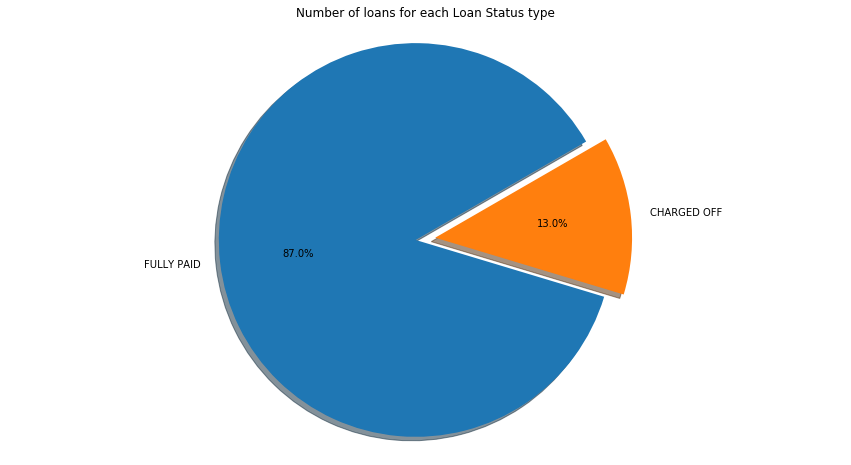

In [41]:
# Plotting a pie chart to understand the frequencies of loans with 'CHARGED OFF' and 'FULLY PAID' statues
counts = loans_data['loan_status'].value_counts()
plt.figure(figsize = (15, 8))
plt.pie(get_percentages(loans_data['loan_status'], counts), explode = explode2, labels = counts.index.tolist(), autopct = '%1.1f%%', shadow = True, startangle = 30)
plt.axis('equal')
plt.title('Number of loans for each Loan Status type')
plt.show()

**Observation**: We can observe that **13.0%** of the total borrowers are defaulters.

### Grades and Sub-Grades:

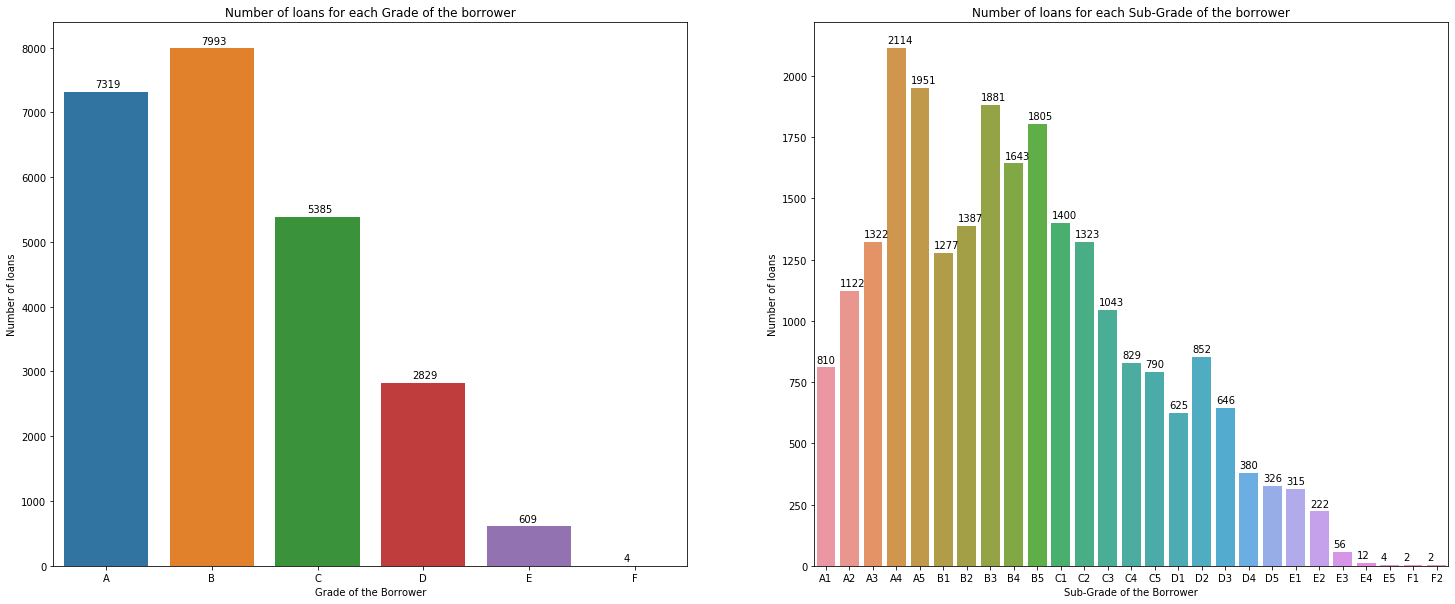

In [42]:
# Plotting bar plots, to understand the frequencies of grades of the borrowers
# Grade
plt.figure(figsize = (25,10))
plt.subplot(1, 2, 1)
ax = sns.barplot(x = 'grade', y = 'id', data = loans_data, estimator = lambda x : len(x), order = list(np.sort(loans_data['grade'].unique())))
plt.title('Number of loans for each Grade of the borrower')
plt.xlabel('Grade of the Borrower')
plt.ylabel('Number of loans')
annotate_count_plot_x(ax,'grade', 0.5, 7*10)

# Sub-Grade
plt.subplot(1, 2, 2)
ax = sns.barplot(x = 'sub_grade', y = 'id', data = loans_data, estimator = lambda x : len(x), order = list(np.sort(loans_data['sub_grade'].unique())))
plt.title('Number of loans for each Sub-Grade of the borrower')
plt.xlabel('Sub-Grade of the Borrower')
plt.ylabel('Number of loans')
annotate_count_plot_x(ax,'sub_grade', 0.8, 2*10)
plt.show()

**Observation**: Most of the borrowers have their grades as **A or B**, and the borrowers got decreased with decrement of the grade. 

### Home Ownership:

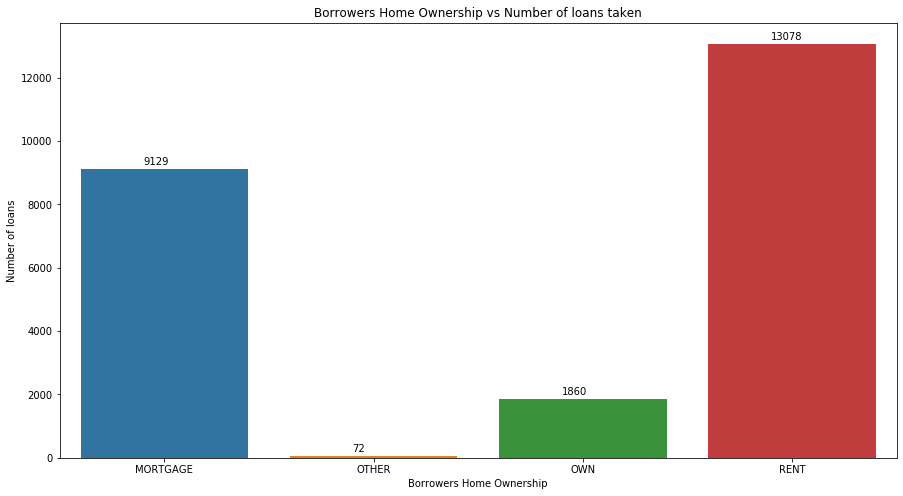

In [43]:
# Plotting a count plot, to understand the home ownership of most of the borrowers
plt.figure(figsize = (15, 8))
ax = sns.countplot(x = 'home_ownership', data = loans_data, order = list(np.sort(loans_data['home_ownership'].unique())))
plt.title('Borrowers Home Ownership vs Number of loans taken')
plt.xlabel('Borrowers Home Ownership')
plt.ylabel('Number of loans')
annotate_count_plot_x(ax,'home_ownership', 0.5, 12*10)
plt.show()

**Observation**: Majority of the borrower's stay in a **rented** or under **mortgage** houses.

### Verification Status:

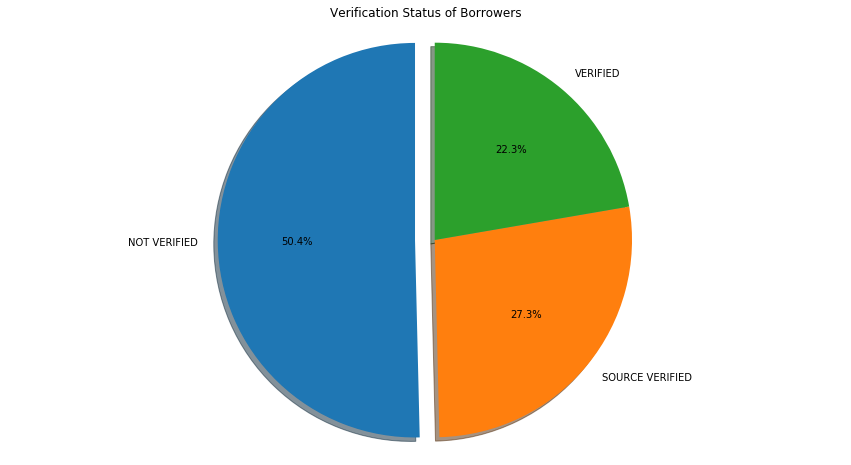

In [44]:
# Plotting a pie chart to understand the verification status of most of the borrowers
counts = loans_data['verification_status'].value_counts()
plt.figure(figsize = (15, 8))
plt.pie(get_percentages(loans_data['verification_status'], counts), explode = explode3, labels = counts.index.tolist(), autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('Verification Status of Borrowers')
plt.show()

**Observation**: Half of the population of borrowers are verified either by LC or by the Source. And nearly **50%** of the borrowers are not verified.

### Purpose:

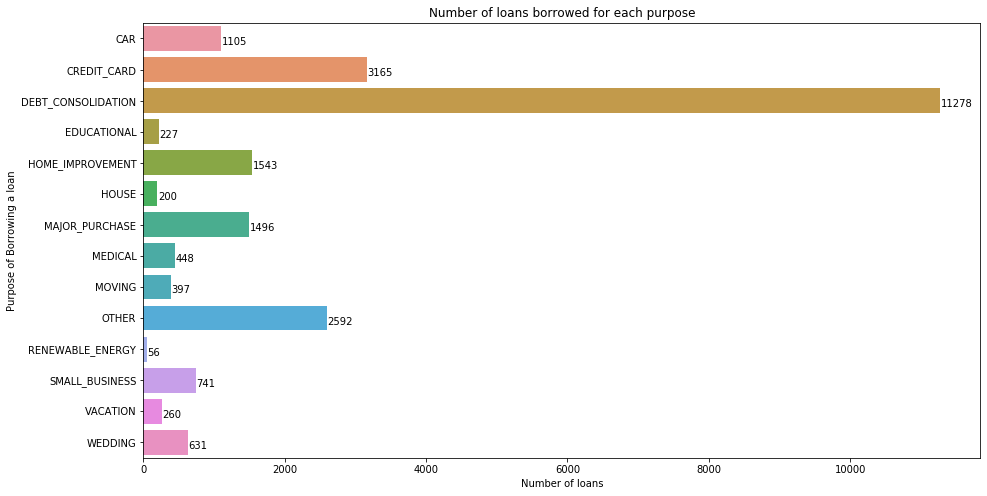

In [45]:
# Plotting a count plot, to understand the purpose of borrowing for most of the borrowers
plt.figure(figsize = (15, 8))
ax = sns.barplot(y = 'purpose', x = 'id', data = loans_data, estimator = lambda x : len(x), order = list(np.sort(loans_data['purpose'].unique())))
plt.title('Number of loans borrowed for each purpose')
plt.ylabel('Purpose of Borrowing a loan')
plt.xlabel('Number of loans')
annotate_count_plot_y(ax,'purpose', 5, 0.2)
plt.show()

**Observation**: Most of the borrowers took loans for the purpose of **Debt Consolidation**.

### Region and State:

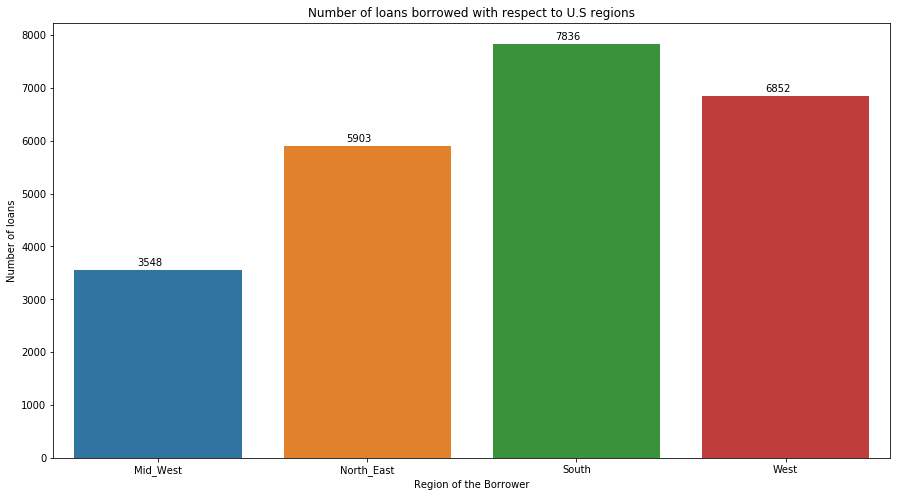

In [46]:
# Plotting a count plot, to understand the region where most of the borrowers belong to
plt.figure(figsize = (15, 8))
ax = sns.barplot(x = 'region', y = 'id', data = loans_data, estimator = lambda x : len(x), order = list(np.sort(loans_data['region'].unique())))
plt.title('Number of loans borrowed with respect to U.S regions')
plt.xlabel('Region of the Borrower')
plt.ylabel('Number of loans')
annotate_count_plot_x(ax,'region', 0.5, 8*10)
plt.show()

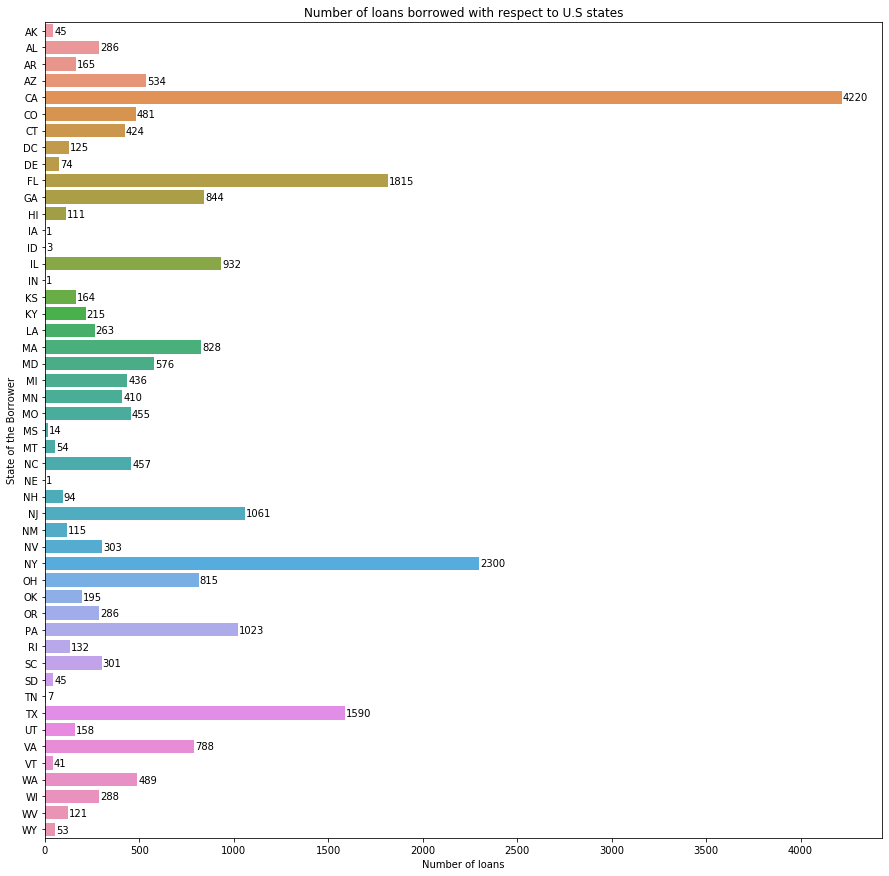

In [47]:
# Plotting a count plot, to understand the state where most of the borrowers belong to
plt.figure(figsize = (15, 15))
ax = sns.barplot(y = 'addr_state', x = 'id', data = loans_data, estimator = lambda x : len(x), order = list(np.sort(loans_data['addr_state'].unique())))
plt.title('Number of loans borrowed with respect to U.S states')
plt.ylabel('State of the Borrower')
plt.xlabel('Number of loans')
annotate_count_plot_y(ax,'addr_state', 5, 0.2)
plt.show()

**Observation**: Most of the borrowers are from **South** region and **California** state.

### Term:

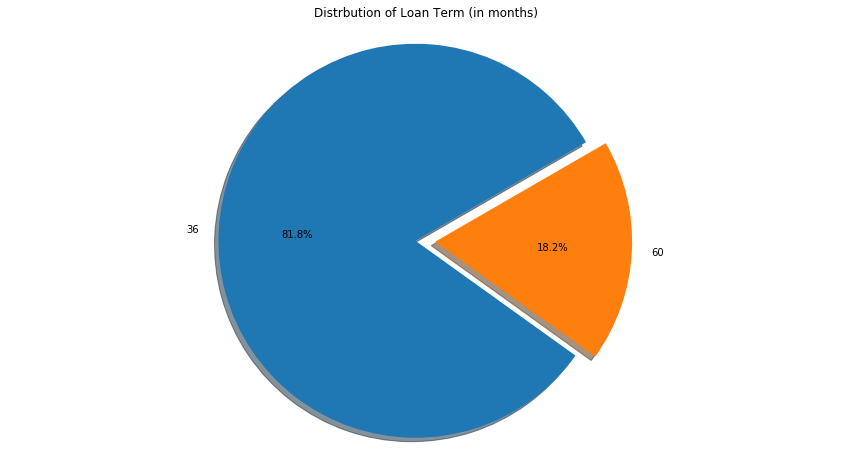

In [48]:
# Plotting a pie chart to understand the loan term which is mostly applied for
counts = loans_data['term'].value_counts()
plt.figure(figsize = (15, 8))
plt.pie(get_percentages(loans_data['term'], counts), explode = explode2, labels = counts.index.tolist(), autopct = '%1.1f%%', shadow = True, startangle = 30)
plt.axis('equal')
plt.title('Distrbution of Loan Term (in months)')
plt.show()

**Observation**: Most of the borrowers are applying for **36 months** loan tenure.

### Employment Length:

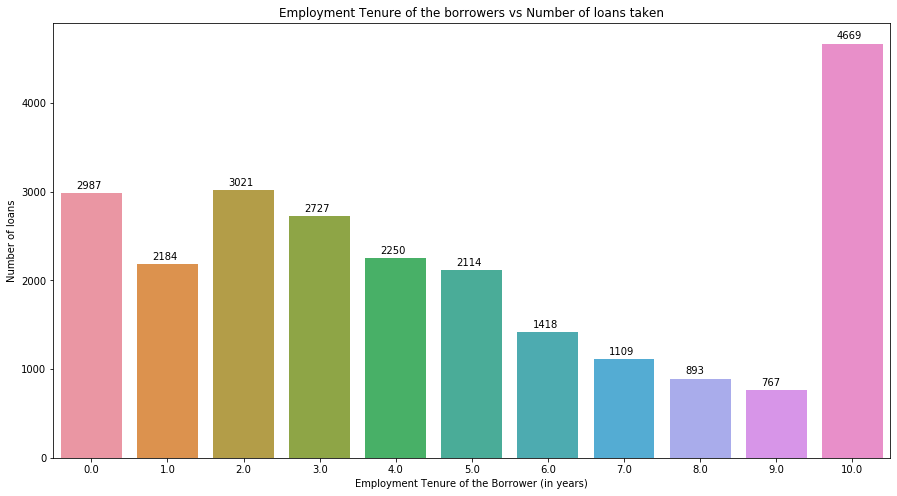

In [49]:
# Plotting a count plot, to understand the employment tenure of the borrowers
plt.figure(figsize = (15, 8))
ax = sns.countplot(x = 'emp_length', data = loans_data, order = list(np.sort(loans_data['emp_length'].unique())))
plt.title('Employment Tenure of the borrowers vs Number of loans taken')
plt.xlabel('Employment Tenure of the Borrower (in years)')
plt.ylabel('Number of loans')
annotate_count_plot_x(ax,'home_ownership', 0.6, 5*10)
plt.show()

**Observation**: Most of the borrowers have **more than 10 years** of experience.

### Inquiries in the last 6 months:

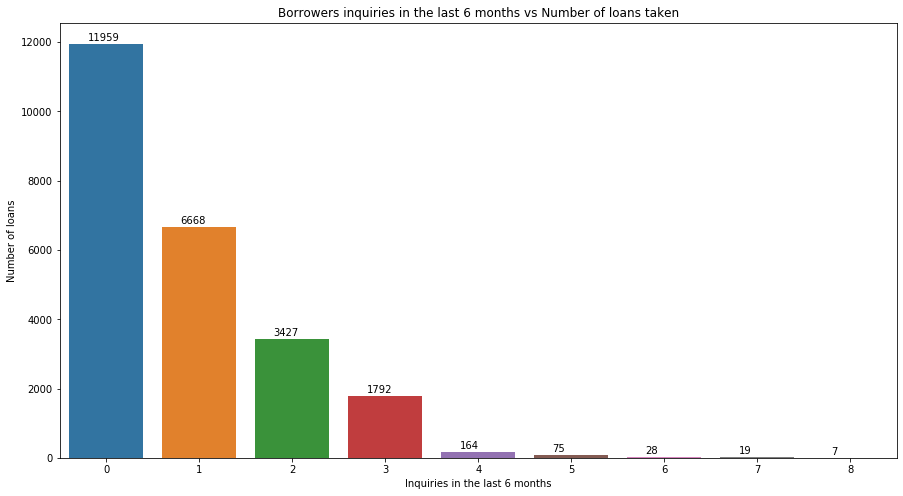

In [50]:
# Plotting a count plot, to understand the inquiries of the borrowers
plt.figure(figsize = (15, 8))
ax = sns.countplot(x = 'inq_last_6mths', data = loans_data, order = list(np.sort(loans_data['inq_last_6mths'].unique())))
plt.title('Borrowers inquiries in the last 6 months vs Number of loans taken')
plt.xlabel('Inquiries in the last 6 months')
plt.ylabel('Number of loans')
annotate_count_plot_x(ax,'inq_last_6mths', 0.6, 9*10)
plt.show()

**Observation**: Frequencies of Inquiries are in **decremental** fashion.
    
### Public Records:

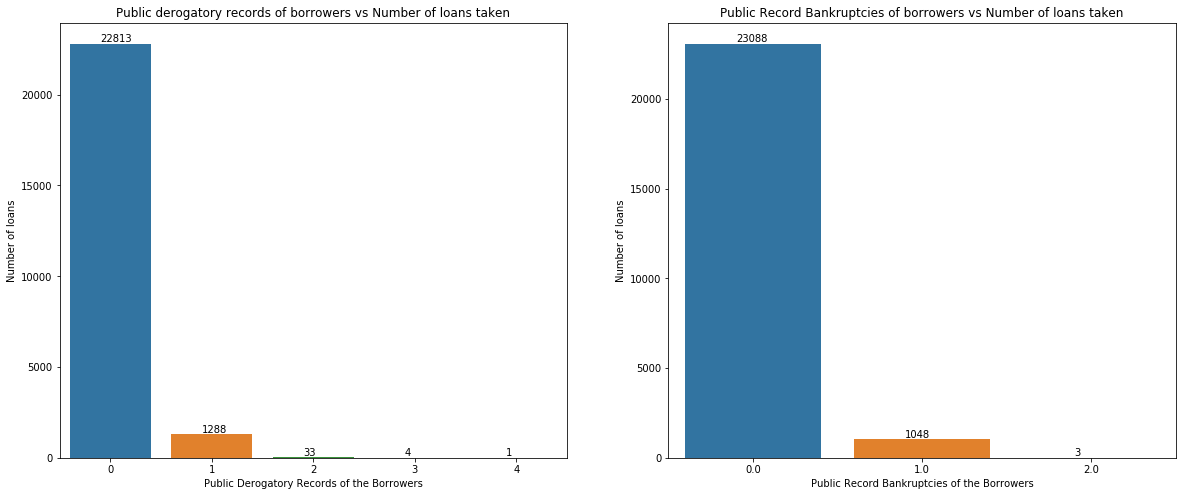

In [51]:
# Plotting count plots, to understand the public record of borrowers
# Public Derogatory records
plt.figure(figsize = (20,8))
plt.subplot(1, 2, 1)
ax = sns.barplot(x = 'pub_rec', y = 'id', data = loans_data, estimator = lambda x : len(x), order = list(np.sort(loans_data['pub_rec'].unique())))
plt.title('Public derogatory records of borrowers vs Number of loans taken')
plt.xlabel('Public Derogatory Records of the Borrowers')
plt.ylabel('Number of loans')
annotate_count_plot_x(ax,'pub_rec', 0.5, 9*10)

#Public Record Bankruptcies
plt.subplot(1, 2, 2)
ax = sns.barplot(x = 'pub_rec_bankruptcies', y = 'id', data = loans_data, estimator = lambda x : len(x), order = list(np.sort(loans_data['pub_rec_bankruptcies'].unique())))
plt.title('Public Record Bankruptcies of borrowers vs Number of loans taken')
plt.xlabel('Public Record Bankruptcies of the Borrowers')
plt.ylabel('Number of loans')
annotate_count_plot_x(ax,'pub_rec_bankruptcies', 0.5, 9*10)
plt.show()

**Observation**: Most of the borrowers have a **clean** record.

### Month and Year of loan issue:

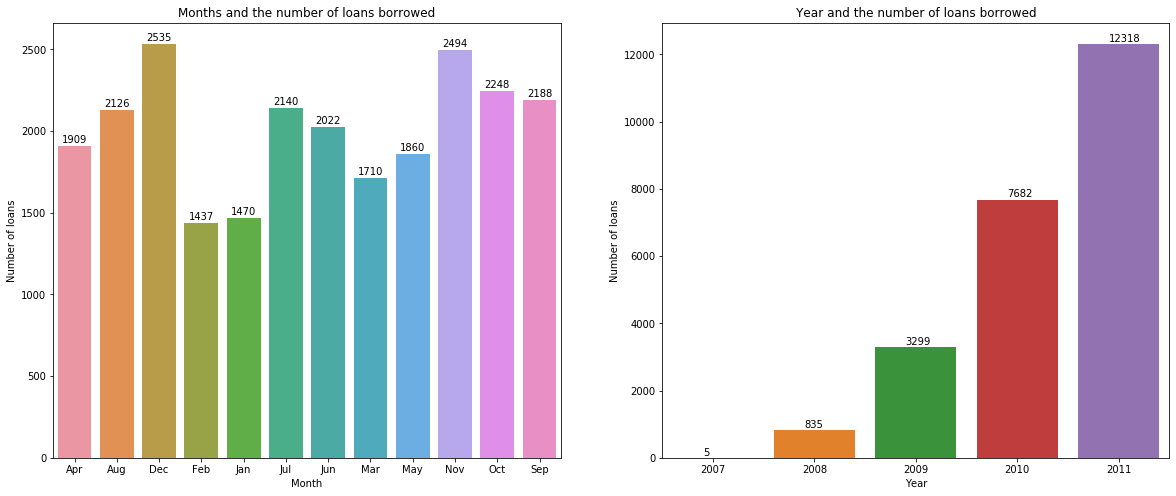

In [52]:
# Plotting count plots, to understand when most of the loans are borrowed
# Month
plt.figure(figsize = (20,8))
plt.subplot(1, 2, 1)
ax = sns.barplot(x = 'month', y = 'id', data = loans_data, estimator = lambda x : len(x), order = list(np.sort(loans_data['month'].unique())))
plt.title('Months and the number of loans borrowed')
plt.xlabel('Month')
plt.ylabel('Number of loans')
annotate_count_plot_x(ax,'month', 0.7, 2*10)

# Year
plt.subplot(1, 2, 2)
ax = sns.barplot(x = 'year', y = 'id', data = loans_data, estimator = lambda x : len(x), order = list(np.sort(loans_data['year'].unique())))
plt.title('Year and the number of loans borrowed')
plt.xlabel('Year')
plt.ylabel('Number of loans')
annotate_count_plot_x(ax,'year', 0.5, 7*10)
plt.show()

**Observation**: More loans were borrowed at the **ending months** of the years and the loan applications got **increased over the past years** in an incremental fashion.

### Employment Title:

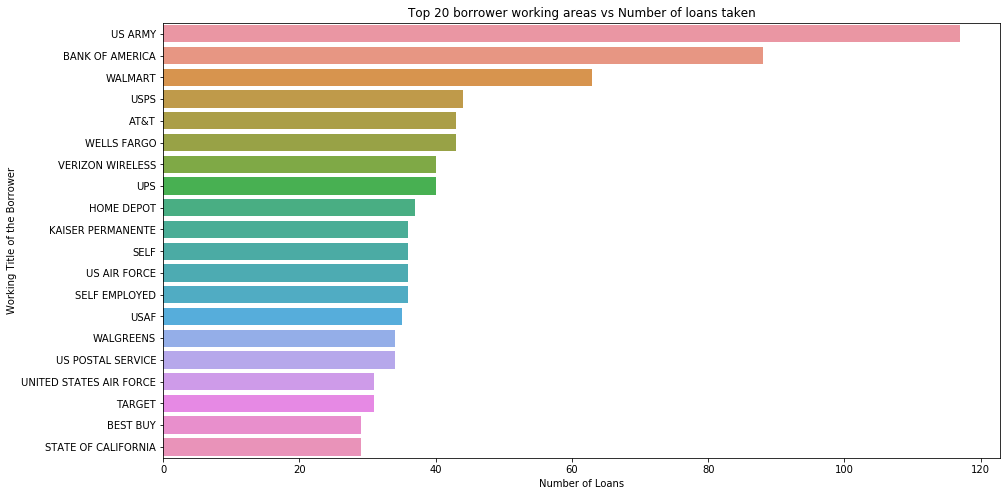

In [53]:
# Plotting a count plot, to understand who are borrowing the loans most
x = loans_data.emp_title.value_counts()[:20].index.values
y = loans_data.emp_title.value_counts()[:20].values
plt.figure(figsize = (15, 8))
sns.barplot(x = y, y = x)
plt.title('Top 20 borrower working areas vs Number of loans taken')
plt.xlabel('Number of Loans')
plt.ylabel('Working Title of the Borrower')
plt.show()

**Observation**: We can observe that most of the borrowers are working in the **US Army**.

### Loan Amount:

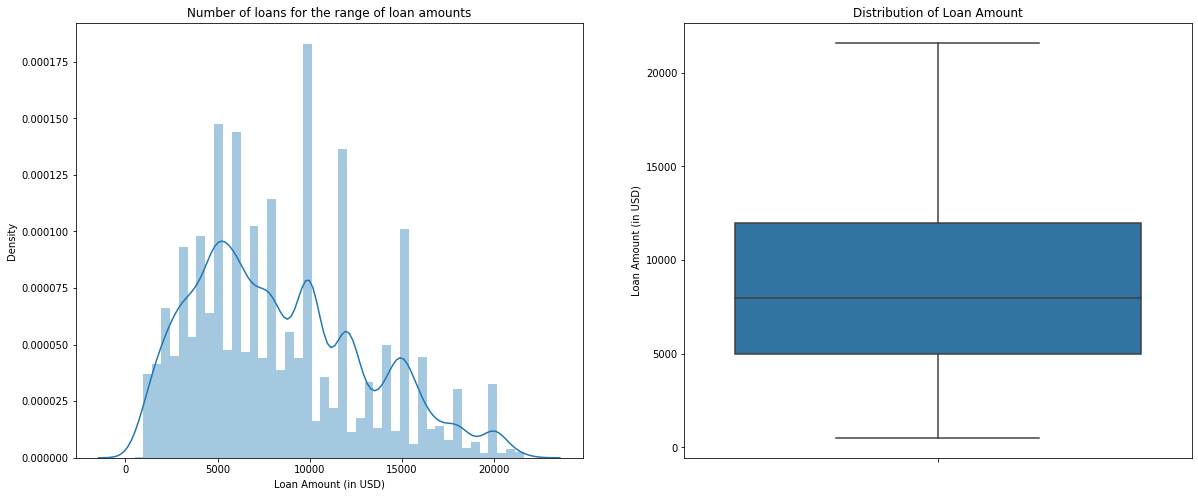

In [54]:
# Understanding the range of loan amounts
plt.figure(figsize = (20,8))
plt.subplot(1, 2, 1)
ax = sns.distplot(loans_data['loan_amnt'])
plt.title('Number of loans for the range of loan amounts')
plt.xlabel('Loan Amount (in USD)')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.boxplot(y = loans_data["loan_amnt"])
plt.title('Distribution of Loan Amount')
plt.ylabel('Loan Amount (in USD)')
plt.show()

**Observation**: Average loan amount borrowered is around **5000 - 10000 USD**.

### Interest Rate:

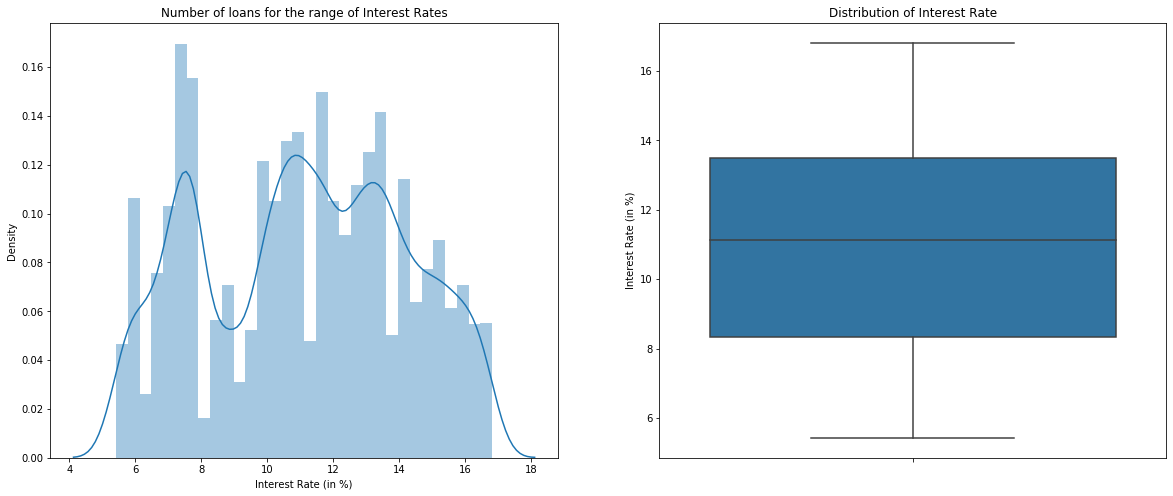

In [55]:
# Understanding the range of Interest Rates
plt.figure(figsize = (20,8))
plt.subplot(1, 2, 1)
ax = sns.distplot(loans_data['int_rate'])
plt.title('Number of loans for the range of Interest Rates')
plt.xlabel('Interest Rate (in %)')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.boxplot(y = loans_data['int_rate'])
plt.title('Distribution of Interest Rate')
plt.ylabel('Interest Rate (in %)')
plt.show()

**Observation**: Average interest rate falls in the range of **9%-14%**.

### Installment Amount:

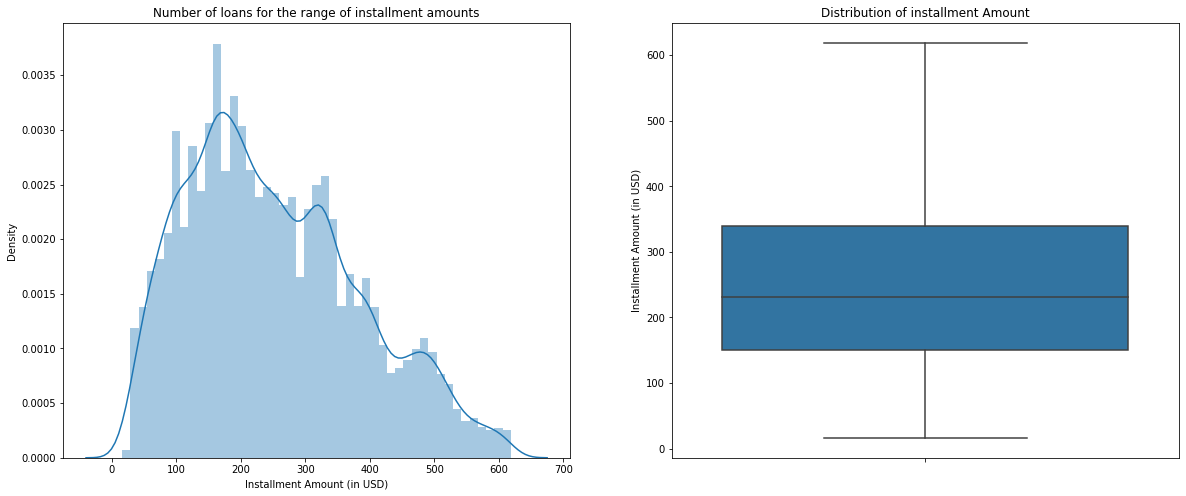

In [56]:
# Understanding the range of installment amounts
plt.figure(figsize = (20,8))
plt.subplot(1, 2, 1)
ax = sns.distplot(loans_data['installment'])
plt.title('Number of loans for the range of installment amounts')
plt.xlabel('Installment Amount (in USD)')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.boxplot(y=loans_data["installment"])
plt.title('Distribution of installment Amount')
plt.ylabel('Installment Amount (in USD)')
plt.show()

**Observation**: Average installment amount falls in the range of **100-300 USD**.

### Annual Income of the borrower:

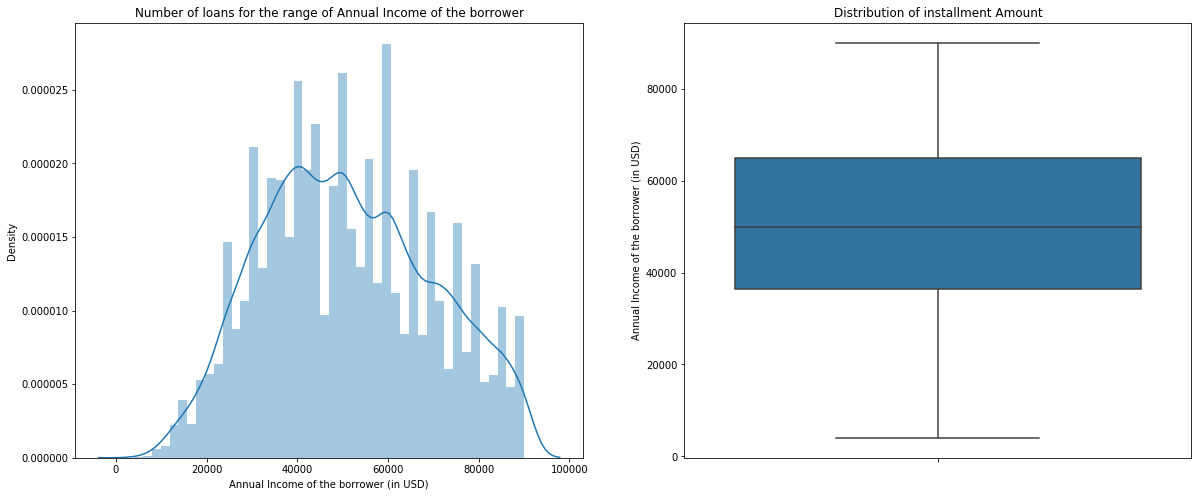

In [57]:
# Understanding the range of annual income of the borrower
plt.figure(figsize = (20,8))
plt.subplot(1, 2, 1)
ax = sns.distplot(loans_data['annual_inc'])
plt.title('Number of loans for the range of Annual Income of the borrower')
plt.xlabel('Annual Income of the borrower (in USD)')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.boxplot(y=loans_data["annual_inc"])
plt.title('Distribution of installment Amount')
plt.ylabel('Annual Income of the borrower (in USD)')
plt.show()

**Observation**: Most of the borrowers have an annual income in the range of **35000 - 60000 USD**.

## Bivariate Analysis:
Understanding the attributes behavior for each of the loan status.

In [58]:
# Helper function to display the DEFAULTERS count and percentage of DEFAULTERS on the top of the bar
def defaulters_plot_x(col, title, o, sort = 'no', rot = 0, xlabel = '', ylabel = 'Number of Loans', x_diff = 0.6, y_diff = 5):
    group = loans_data.groupby(['loan_status', col])[col].count()   
    if(sort == 'sort_order'):
        l = np.sort(loans_data[col].unique()).tolist()
        ax = sns.countplot(x = col, data = loans_data, order = l)
    else:
        ax = sns.countplot(x = col, data = loans_data, order = o)
        
    i = -1
    for p in ax.patches:
        i = i + 1
        percentage = str(round((100 * group[i] / p.get_height()), 1).astype(object)) + '%' + '\n' + ' (' + str(group[i]) + ')'
        x = p.get_x() + p.get_width() - x_diff
        y = p.get_y() + p.get_height() + y_diff
        ax.annotate(percentage, (x, y))
        if i == group.count() / 2:
            break
    plt.xticks(rotation = rot) 
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    
def defaulters_plot_y(col, title, o, sort = 'no', rot = 0, xlabel = 'Number of Loans', ylabel = '', x_diff = 5, y_diff = 0.6):
    group = loans_data.groupby(['loan_status', col])[col].count()   
    if(sort == 'sort_order'):
        l = np.sort(loans_data[col].unique()).tolist()
        ax = sns.countplot(y = col, data = loans_data, order = l)
    else:
        ax = sns.countplot(y = col, data = loans_data, order = o)
        
    i = -1
    for p in ax.patches:
        i = i + 1
        percentage = str(round((100 * group[i] / p.get_width()), 1).astype(object)) + '%' + '\n' + ' (' + str(group[i]) + ')'
        x = p.get_x() + p.get_width() + x_diff
        y = p.get_y() + p.get_height() - y_diff
        ax.annotate(percentage, (x, y))
        if i == group.count() / 2:
            break
    plt.xticks(rotation = rot) 
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)

### Grades and Sub-Grades:

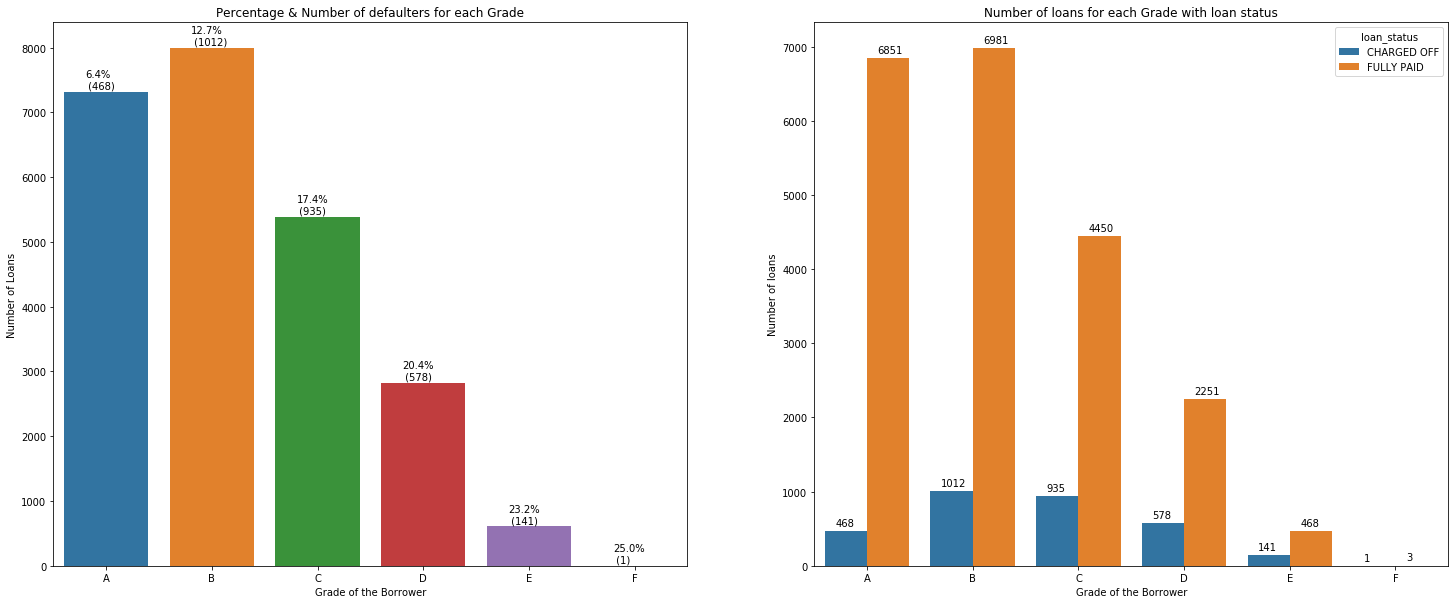

In [59]:
# Plotting bar plots, to understand which grade borrowers are defaulters
plt.figure(figsize = (25,10))
plt.subplot(1, 2, 1)
ax = defaulters_plot_x('grade', 'Percentage & Number of defaulters for each Grade', list(np.sort(loans_data['grade'].unique())), 'sort_order', 0, 'Grade of the Borrower', 'Number of Loans', 0.6, 5*10)

plt.subplot(1, 2, 2)
ax = sns.barplot(x = 'grade', y = 'id', hue='loan_status', data = loans_data, estimator = lambda x : len(x), order = list(np.sort(loans_data['grade'].unique())))
plt.title('Number of loans for each Grade with loan status')
plt.xlabel('Grade of the Borrower')
plt.ylabel('Number of loans')
annotate_count_plot_x(ax,'grade', 0.3, 7*10)
plt.show()

**Observation**: As the Grade decreases, the percentage of the defaulters are also increasing.
### <font color='red'>GRADE</font> plays an important role in determining if the borrower might turn out to be a defaulter. If the borrower has a grade other than 'A or B' is tend to default the loan.

### Interest Rate:

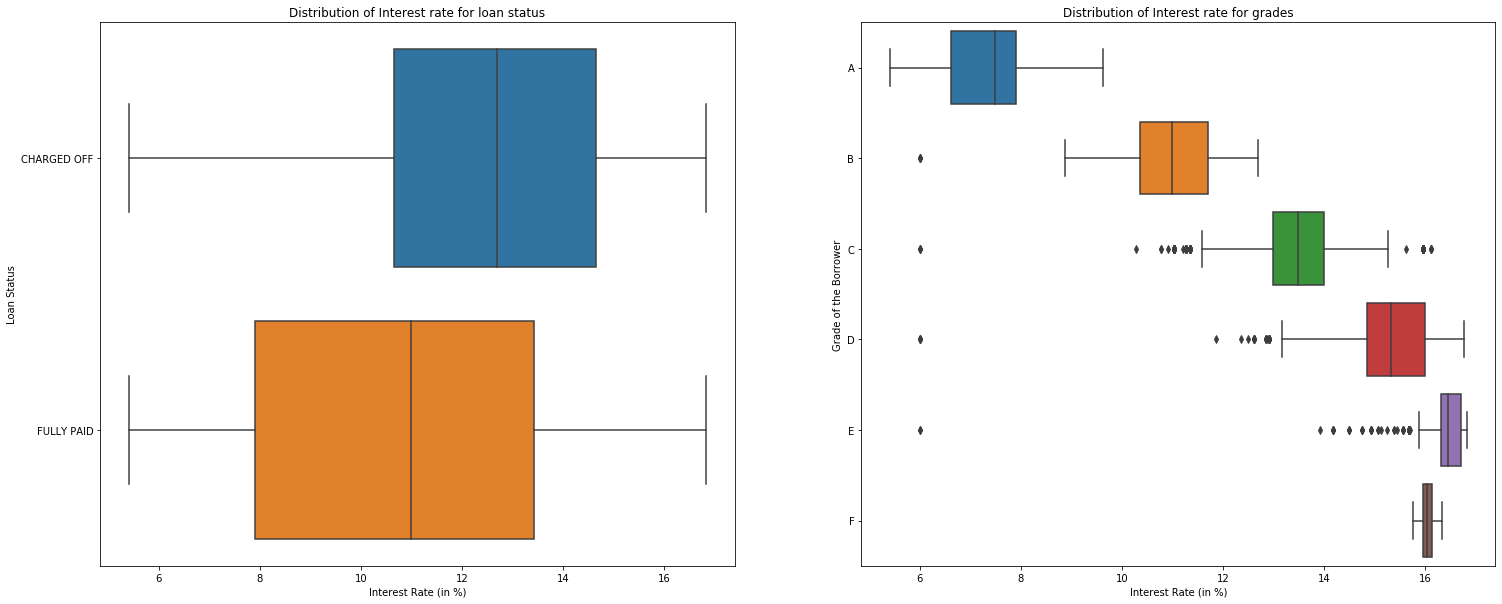

In [60]:
# Plotting a bar and box plot, to understand if interest rate is a driving factor to default
plt.figure(figsize = (25,10))
plt.subplot(1, 2, 1)
ax = sns.boxplot(x = loans_data['int_rate'], y = loans_data['loan_status'])
plt.title('Distribution of Interest rate for loan status')
plt.xlabel('Interest Rate (in %)')
plt.ylabel('Loan Status')

plt.subplot(1, 2, 2)
ax = sns.boxplot(x = 'int_rate', y = 'grade', data = loans_data, order = np.sort(loans_data['grade'].unique()).tolist())
plt.title('Distribution of Interest rate for grades')
plt.xlabel('Interest Rate (in %)')
plt.ylabel('Grade of the Borrower')
plt.show()

**Observation**: For loans with **higher** interest rate are more prone to default. And as we observe the distribution in Grades, for Grade-A borrowers, the interest rate is less compared to the other grades. From the above analysis, we can say that Grade-A borrowers are more likely to pay the loan fully. 
### <font color = 'red'>INTEREST RATE</font> is a driving factor to a borrower to turn as a defaulter. Higher interest rate might be more tending towards a loan default.
### Term:

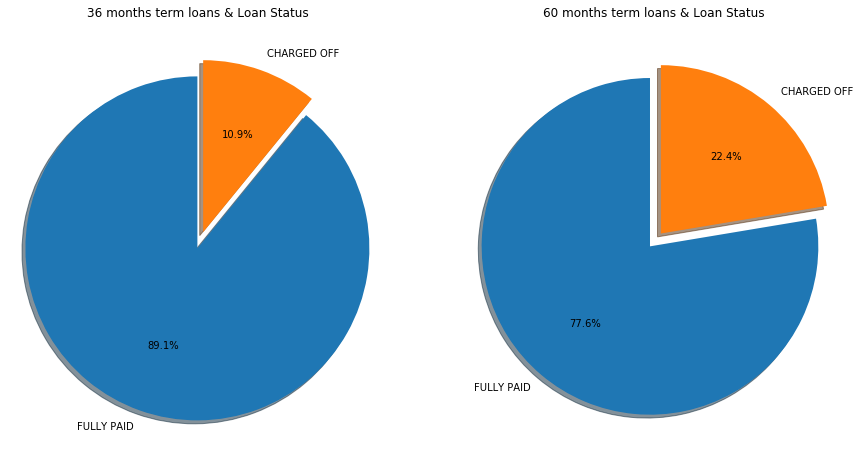

In [61]:
# Plotting pie charts to understand the percentage of deafulters for each term
t1 = loans_data[loans_data.term == 36]
t2 = loans_data[loans_data.term == 60]
fig, ax = plt.subplots(1,2, figsize=(15,8))

counts = t1['loan_status'].value_counts()
ax[0].pie(get_percentages(t1['loan_status'], counts), explode = explode2, labels = counts.index.tolist(), autopct = '%1.1f%%', shadow = True, startangle = 90)
ax[0].axis('equal')
ax[0].title.set_text('36 months term loans & Loan Status')

counts = t2['loan_status'].value_counts()
ax[1].pie(get_percentages(t2['loan_status'], counts), explode = explode2, labels = counts.index.tolist(), autopct = '%1.1f%%', shadow = True, startangle = 90)
ax[1].axis('equal')
ax[1].title.set_text('60 months term loans & Loan Status')
plt.show()

**Observation**: Loans approved for 60 months have a greater percentage (22.4%) approximately **double** to the loans approved for 36 months to default.
### <font color = 'red'>TERM</font> is a driving factor to a loan to default, 60 months loan tenure have more chances to default.
### Loan Amount:

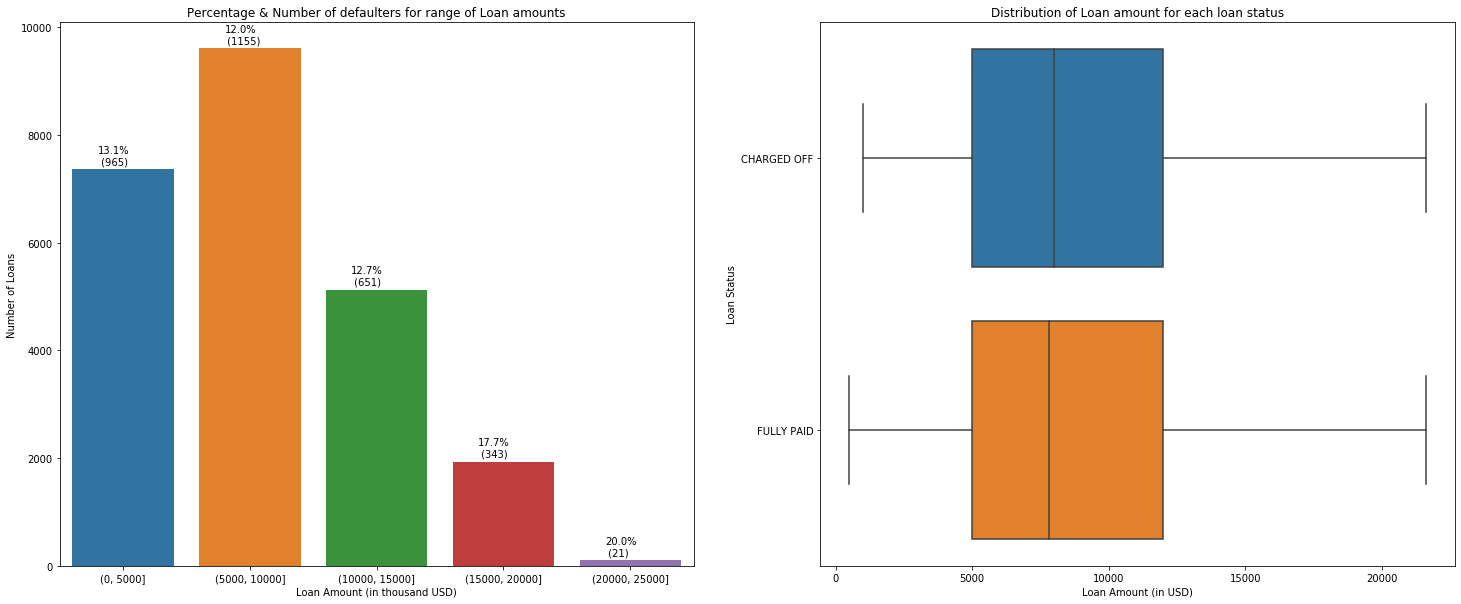

In [62]:
# Plotting a bar and box plot, to understand if loan amount is a driving factor to default
plt.figure(figsize = (25,10))
plt.subplot(1, 2, 1)
ax = defaulters_plot_x('loan_amnt_bin', 'Percentage & Number of defaulters for range of Loan amounts', list(np.sort(loans_data['loan_amnt_bin'].unique())), 'no', 0, 'Loan Amount (in thousand USD)', 'Number of Loans', 0.6, 9*10)

plt.subplot(1, 2, 2)
ax = sns.boxplot(x = loans_data['loan_amnt'], y = loans_data['loan_status'])
plt.title('Distribution of Loan amount for each loan status')
plt.xlabel('Loan Amount (in USD)')
plt.ylabel('Loan Status')
plt.show()

**Observation**: Most of the loans fall under the range of **5-10 thousand USD** and is in a decremental pattern from then. There is no much difference in the percentages of the defaulters for each bin of loan amount. From the box plot we can observe that there is not much difference in the loan amount for defaults and fully paid loans.
### Home Ownership:

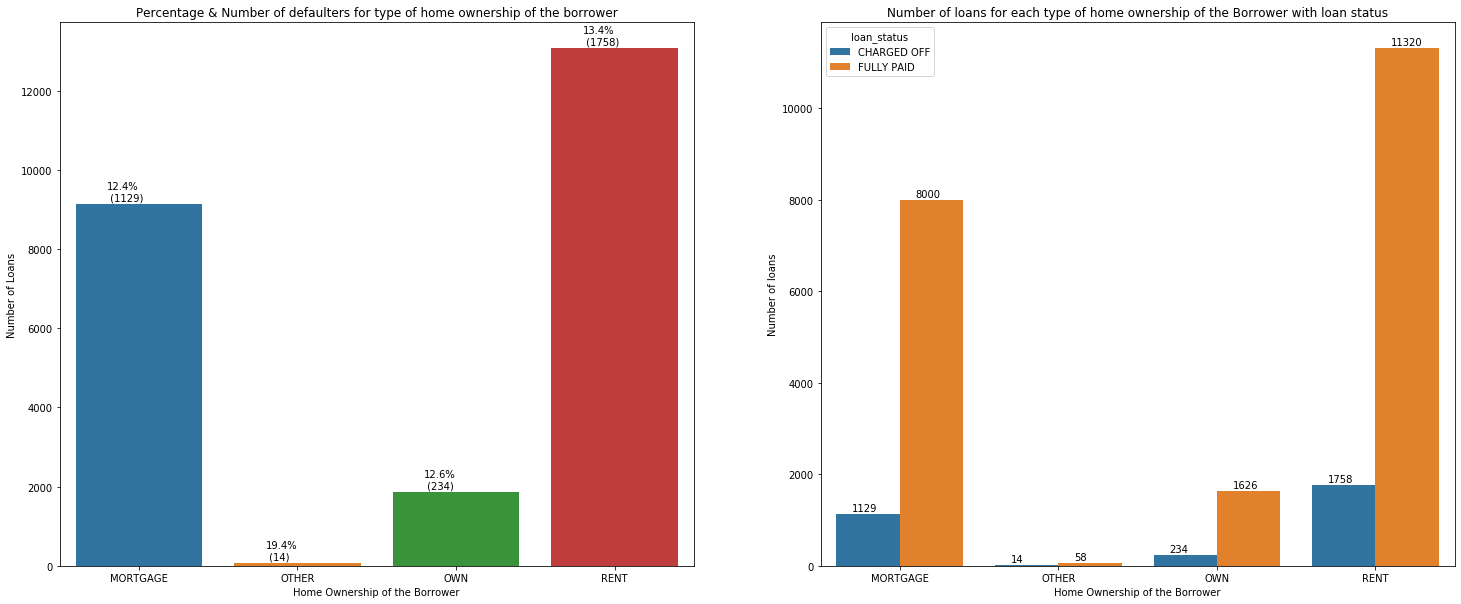

In [63]:
# Plotting a bar plot, to understand if a borrower's Home ownership drives default of loan
plt.figure(figsize = (25,10))
plt.subplot(1, 2, 1)
ax = defaulters_plot_x('home_ownership', 'Percentage & Number of defaulters for type of home ownership of the borrower', list(np.sort(loans_data['home_ownership'].unique())), 'sort_order', 0, 'Home Ownership of the Borrower', 'Number of Loans', 0.6, 9*10)

plt.subplot(1, 2, 2)
ax = sns.barplot(x = 'home_ownership', y = 'id', hue = 'loan_status', data = loans_data, estimator=lambda x: len(x), order = list(np.sort(loans_data['home_ownership'].unique())))
plt.title('Number of loans for each type of home ownership of the Borrower with loan status')
plt.xlabel('Home Ownership of the Borrower')
plt.ylabel('Number of loans')
annotate_count_plot_x(ax,'home_ownership', 0.3, 7*10)
plt.show()

**Observation**: Borrowers who own a house are more likely to fully repay the loan and borrowers who live in **rented or houses under mortgage** are more likely to default.
### <font color='red'>HOME OWNERSHIP</font> is one of the driving factors for defaulting a loan. Borrowers who don't own a house are more likely to default. They might be having other loans for mortgage or rent due to which they are unable to fully pay the loan.
### Verification Status:

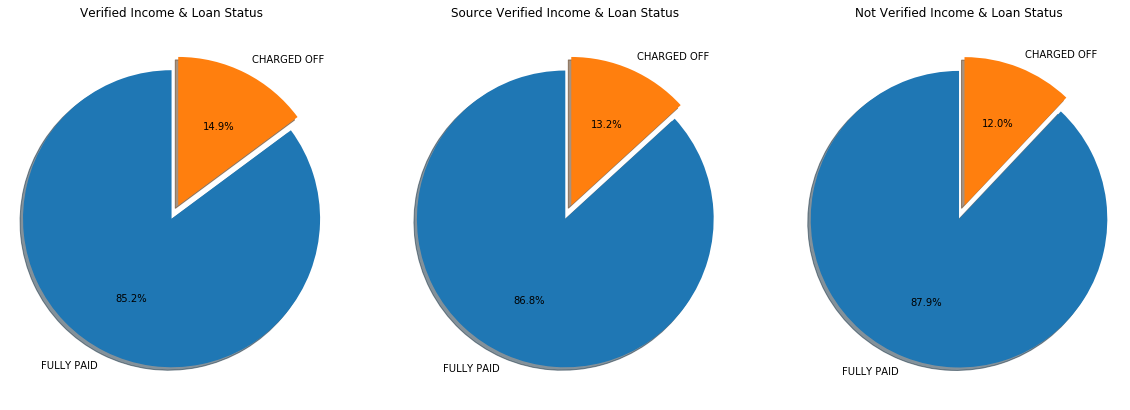

In [64]:
# Plotting a pie plot, to understand if a borrower's verification drives default of loan
verified = loans_data[loans_data.verification_status == 'VERIFIED']
source_verified = loans_data[loans_data.verification_status == 'SOURCE VERIFIED']
not_verified = loans_data[loans_data.verification_status == 'NOT VERIFIED']
fig, ax = plt.subplots(1,3, figsize=(20,7))

counts = verified['loan_status'].value_counts()
ax[0].pie(get_percentages(verified['loan_status'], counts), explode = explode2, labels = counts.index.tolist(), autopct = '%1.1f%%', shadow = True, startangle = 90)
ax[0].axis('equal')
ax[0].title.set_text('Verified Income & Loan Status')

counts = source_verified['loan_status'].value_counts()
ax[1].pie(get_percentages(source_verified['loan_status'], counts), explode = explode2, labels = counts.index.tolist(), autopct = '%1.1f%%', shadow = True, startangle = 90)
ax[1].axis('equal')
ax[1].title.set_text('Source Verified Income & Loan Status')

counts = not_verified['loan_status'].value_counts()
ax[2].pie(get_percentages(not_verified['loan_status'], counts), explode = explode2, labels = counts.index.tolist(), autopct = '%1.1f%%', shadow = True, startangle = 90)
ax[2].axis('equal')
ax[2].title.set_text('Not Verified Income & Loan Status')
plt.show()

**Observation**: We can observe that there is **no** much difference in the defaulted percentages for different types of verification statues.

### Purpose:

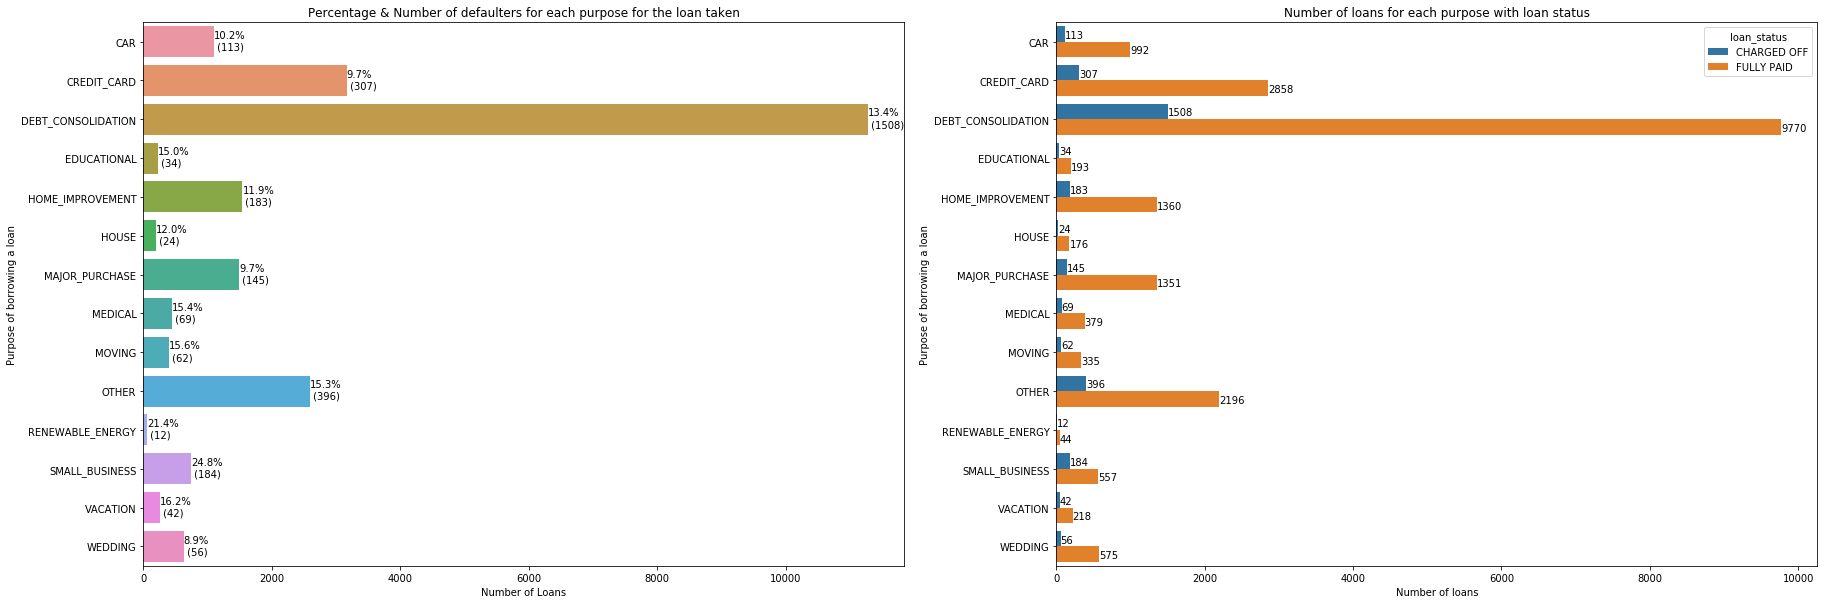

In [65]:
# Plotting a bar plot, to understand if a purpose for the loan taken drives default of loan
plt.figure(figsize = (30, 10))
plt.subplot(1, 2, 1)
ax = defaulters_plot_y('purpose', 'Percentage & Number of defaulters for each purpose for the loan taken', list(np.sort(loans_data['purpose'].unique())), 'sort_order', 0, 'Number of Loans', 'Purpose of borrowing a loan',0, 0.2)

plt.subplot(1, 2, 2)
ax = sns.barplot(y = 'purpose', x = 'id', hue = 'loan_status', data = loans_data, estimator = lambda x: len(x), order = list(np.sort(loans_data['purpose'].unique())))
plt.title('Number of loans for each purpose with loan status')
plt.ylabel('Purpose of borrowing a loan')
plt.xlabel('Number of loans')
annotate_count_plot_y(ax,'purpose', 0, 0.1)
plt.show()

**Observation**: **Small Business, Renewable energy, Vacation** are the top three purposes where the loans are more likely to be defaulted.
### <font color = 'red'>PURPOSE</font> is one of the driving factor for a loan to default, the top three purposes mentioned about are the loans where there are mostly defaulted.
### Region:

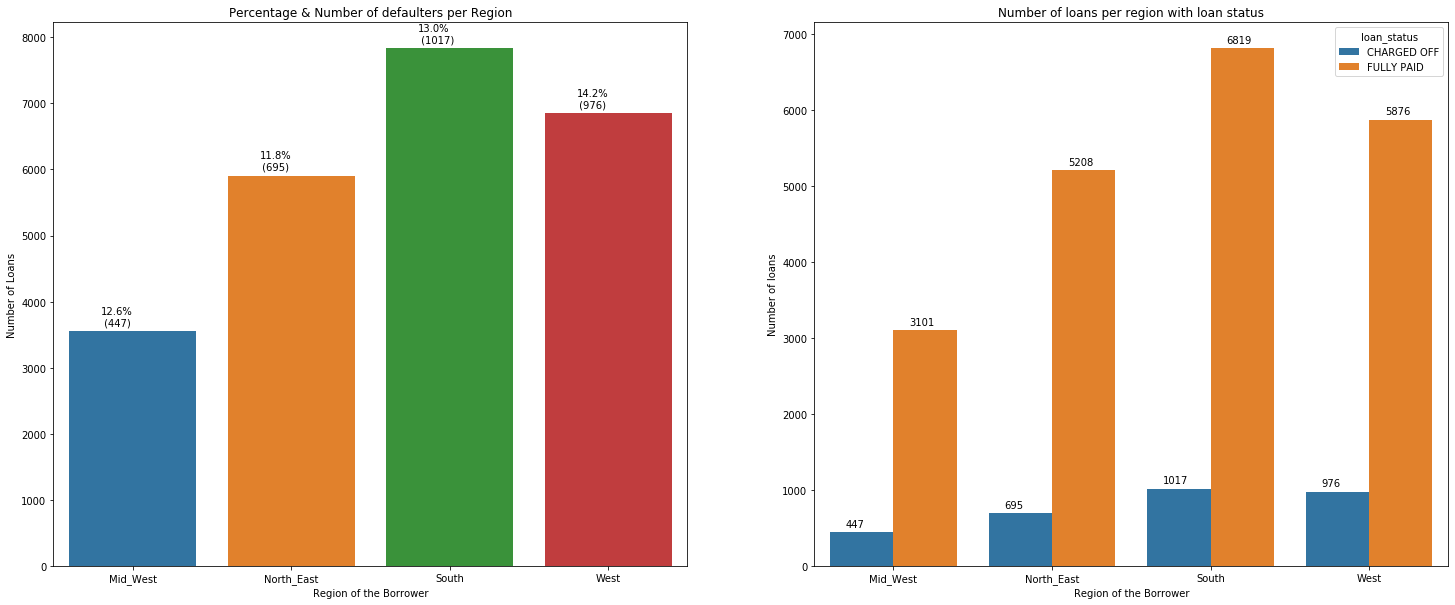

In [66]:
# Plotting a bar plot, to understand if a borrower's Home ownership drives default of loan
plt.figure(figsize = (25,10))
plt.subplot(1, 2, 1)
ax = defaulters_plot_x('region', 'Percentage & Number of defaulters per Region', list(np.sort(loans_data['region'].unique())), 'sort_order', 0, 'Region of the Borrower', 'Number of Loans', 0.6, 9*10)

plt.subplot(1, 2, 2)
ax = sns.barplot(x = 'region', y = 'id', hue = 'loan_status', data = loans_data, estimator=lambda x: len(x), order = list(np.sort(loans_data['region'].unique())))
plt.title('Number of loans per region with loan status')
plt.xlabel('Region of the Borrower')
plt.ylabel('Number of loans')
annotate_count_plot_x(ax,'region', 0.3, 7*10)
plt.show()

**Observation**: There is **no much** difference in the defaulters percentage with respect to the different regions of US.
### Year:

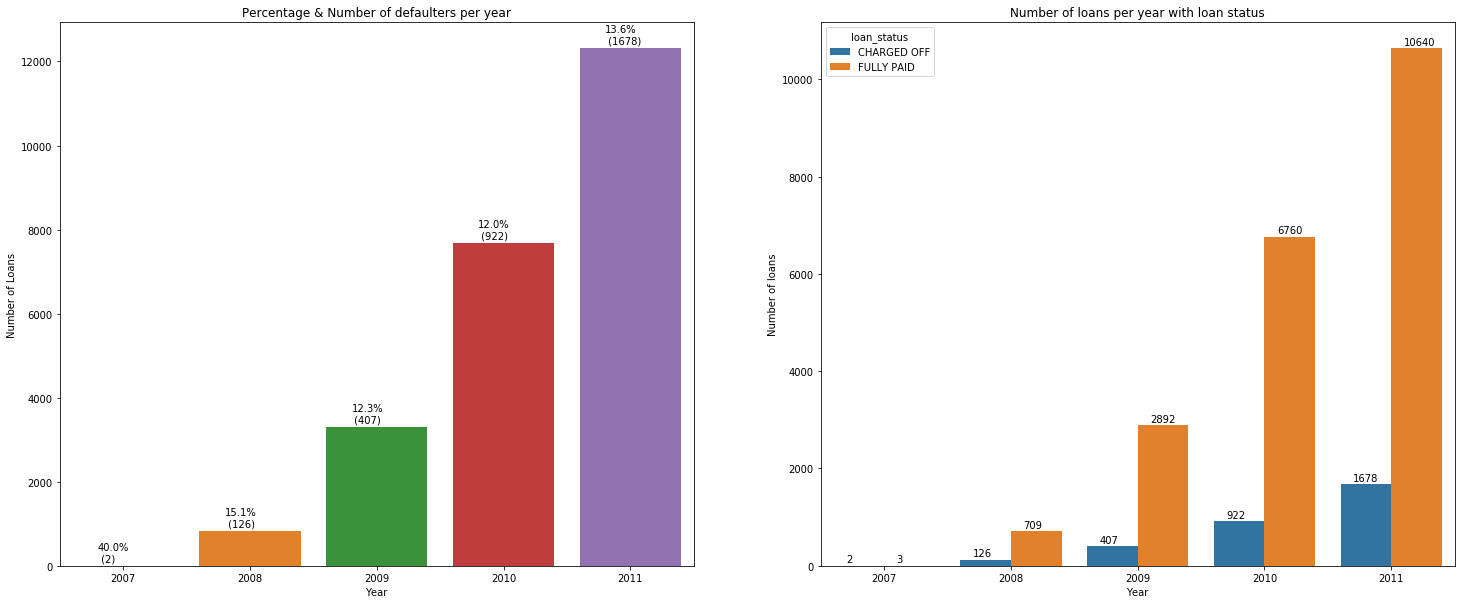

In [67]:
plt.figure(figsize = (25,10))
plt.subplot(1, 2, 1)
ax = defaulters_plot_x('year', 'Percentage & Number of defaulters per year', list(np.sort(loans_data['year'].unique())), 'sort_order', 0, 'Year', 'Number of Loans', 0.6, 10*10)

plt.subplot(1, 2, 2)
ax = sns.barplot(x = 'year', y = 'id', hue = 'loan_status', data = loans_data, estimator=lambda x: len(x), order = list(np.sort(loans_data['year'].unique())))
plt.title('Number of loans per year with loan status')
plt.xlabel('Year')
plt.ylabel('Number of loans')
annotate_count_plot_x(ax,'year', 0.3, 7*10)
plt.show()

**Observation**: The number of loan issues got increased with the years and there is not much difference in the defautlters percentage.
### Month:

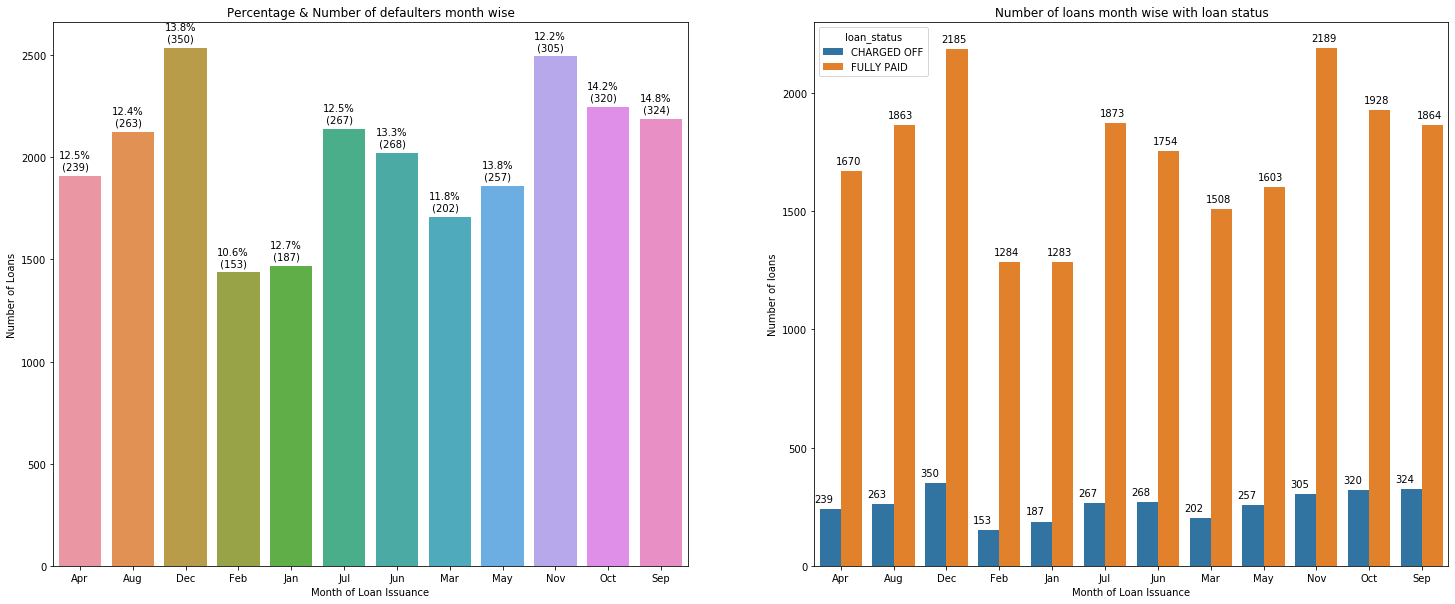

In [68]:
# Plotting a bar plot, to understand if the month of loan issuance drives default of loan
plt.figure(figsize = (25,10))
plt.subplot(1, 2, 1)
ax = defaulters_plot_x('month', 'Percentage & Number of defaulters month wise', list(np.sort(loans_data['month'].unique())), 'no', 0, 'Month of Loan Issuance', 'Number of Loans', 0.8, 3*10)

plt.subplot(1, 2, 2)
ax = sns.barplot(x = 'month', y = 'id', hue = 'loan_status', data = loans_data, estimator=lambda x: len(x), order = list(np.sort(loans_data['month'].unique())))
plt.title('Number of loans month wise with loan status')
plt.xlabel('Month of Loan Issuance')
plt.ylabel('Number of loans')
annotate_count_plot_x(ax,'month', 0.5, 3*10)
plt.show()

**Observation**: We can observe that the percentage of defaulters is less for the starting months of the year and went increasing to the end of year.
### <font color= 'red'>MONTH OF LOAN ISSUANCE</font> is to be considered, as the loans issued in the ending months of the year are more likely to be defaulted.
### Public Records:

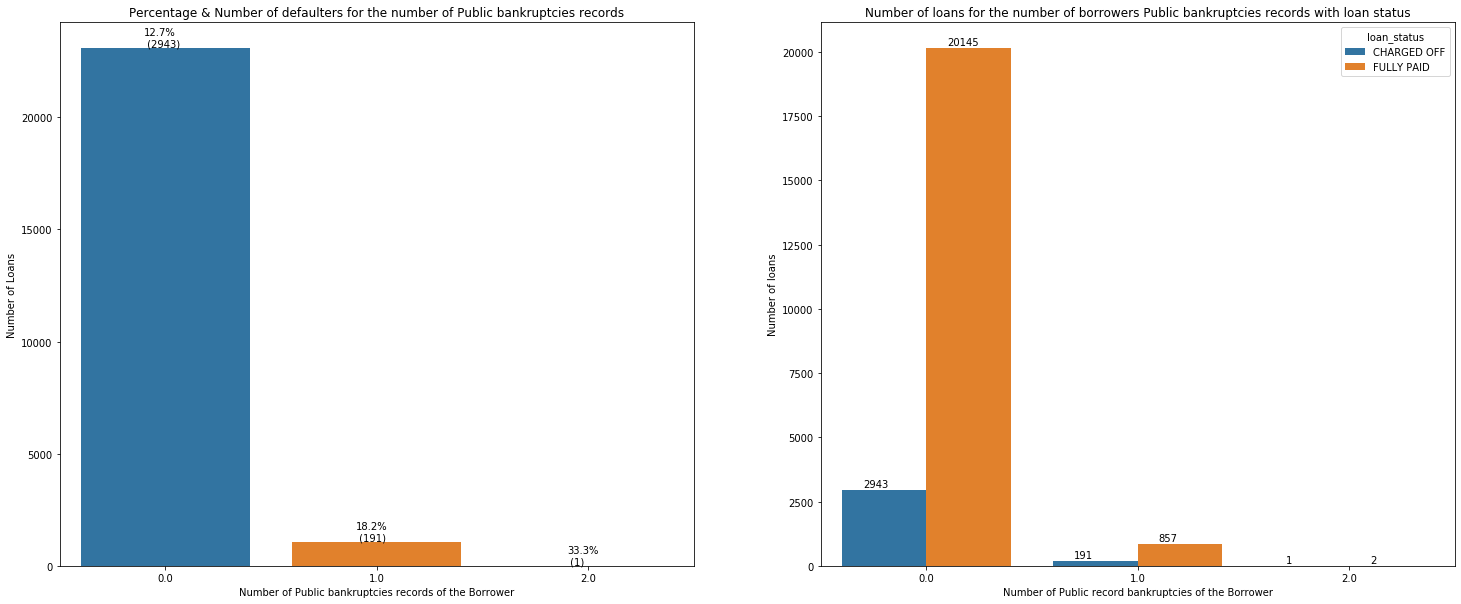

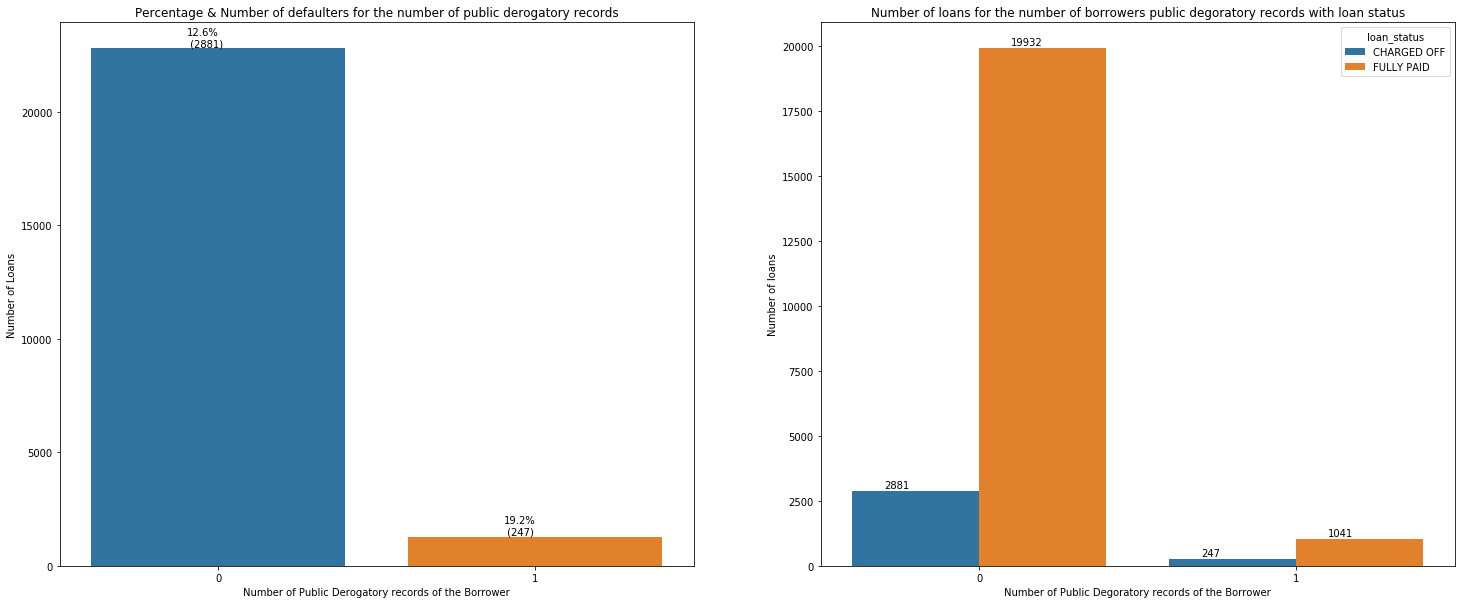

In [69]:
# Plotting a bar plot, to understand if the public records drive default of loan

plt.figure(figsize = (25,10))
plt.subplot(1, 2, 1)
ax = defaulters_plot_x('pub_rec_bankruptcies', 'Percentage & Number of defaulters for the number of Public bankruptcies records', list(np.sort(loans_data['pub_rec_bankruptcies'].unique())), 'no', 0, 'Number of Public bankruptcies records of the Borrower', 'Number of Loans', 0.5, 7*10)

plt.subplot(1, 2, 2)
ax = sns.barplot(x = 'pub_rec_bankruptcies', y = 'id', hue = 'loan_status', data = loans_data, estimator=lambda x: len(x), order = list(np.sort(loans_data['pub_rec_bankruptcies'].unique())))
plt.title('Number of loans for the number of borrowers Public bankruptcies records with loan status')
plt.xlabel('Number of Public record bankruptcies of the Borrower')
plt.ylabel('Number of loans')
annotate_count_plot_x(ax,'pub_rec_bankruptcies', 0.3, 12*10)
plt.show()

plt.figure(figsize = (25,10))
plt.subplot(1, 2, 1)
ax = defaulters_plot_x('pub_rec', 'Percentage & Number of defaulters for the number of public derogatory records', [0, 1], 'no', 0, 'Number of Public Derogatory records of the Borrower', 'Number of Loans', 0.5, 7*10)

plt.subplot(1, 2, 2)
ax = sns.barplot(x = 'pub_rec', y = 'id', hue = 'loan_status', data = loans_data, estimator=lambda x: len(x), order = [0, 1])
plt.title('Number of loans for the number of borrowers public degoratory records with loan status')
plt.xlabel('Number of Public Degoratory records of the Borrower')
plt.ylabel('Number of loans')
annotate_count_plot_x(ax,'pub_rec', 0.3, 12*10)
plt.show()

**Observation**: It is clear that borrower's with more number of public records are more likely to be a defaulter.
### <font color='red'>PUBLIC RECORDS</font> can speak about the loan defauting. More number of records, the borrower is more likely to default the loan.
### Employment Length:

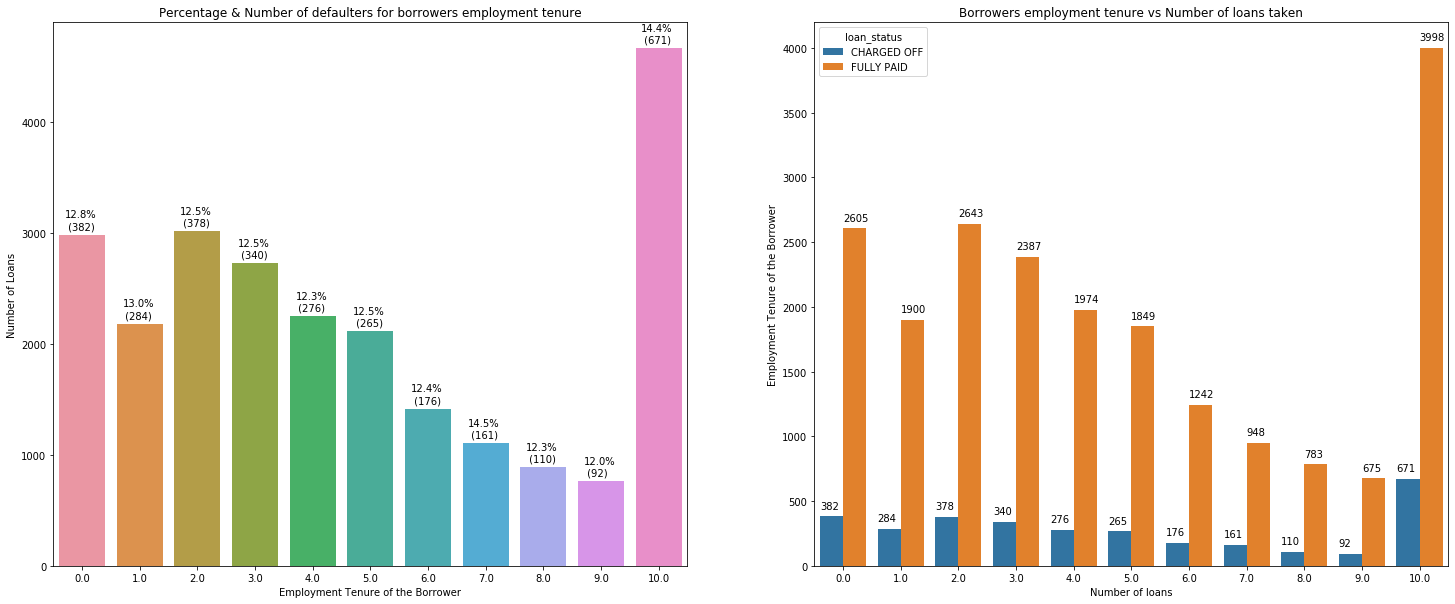

In [70]:
# Plotting a bar plot, to understand if borrowers employment tenure drives default of loan
plt.figure(figsize = (25, 10))
plt.subplot(1, 2, 1)
ax = defaulters_plot_x('emp_length', 'Percentage & Number of defaulters for borrowers employment tenure', [], 'sort_order', 0, 'Employment Tenure of the Borrower', 'Number of Loans', 0.7, 5*10)

plt.subplot(1, 2, 2)
ax = sns.barplot(x = 'emp_length', y = 'id', hue = 'loan_status', data = loans_data, estimator=lambda x: len(x))
plt.title('Borrowers employment tenure vs Number of loans taken')
plt.ylabel('Employment Tenure of the Borrower')
plt.xlabel('Number of loans')
annotate_count_plot_x(ax,'emp_length', 0.4, 6*10)
plt.show()

**Observation**: There is no much difference in the percentage of the defaulters for the range of employment tenure.
### Debt To Income - DTI:

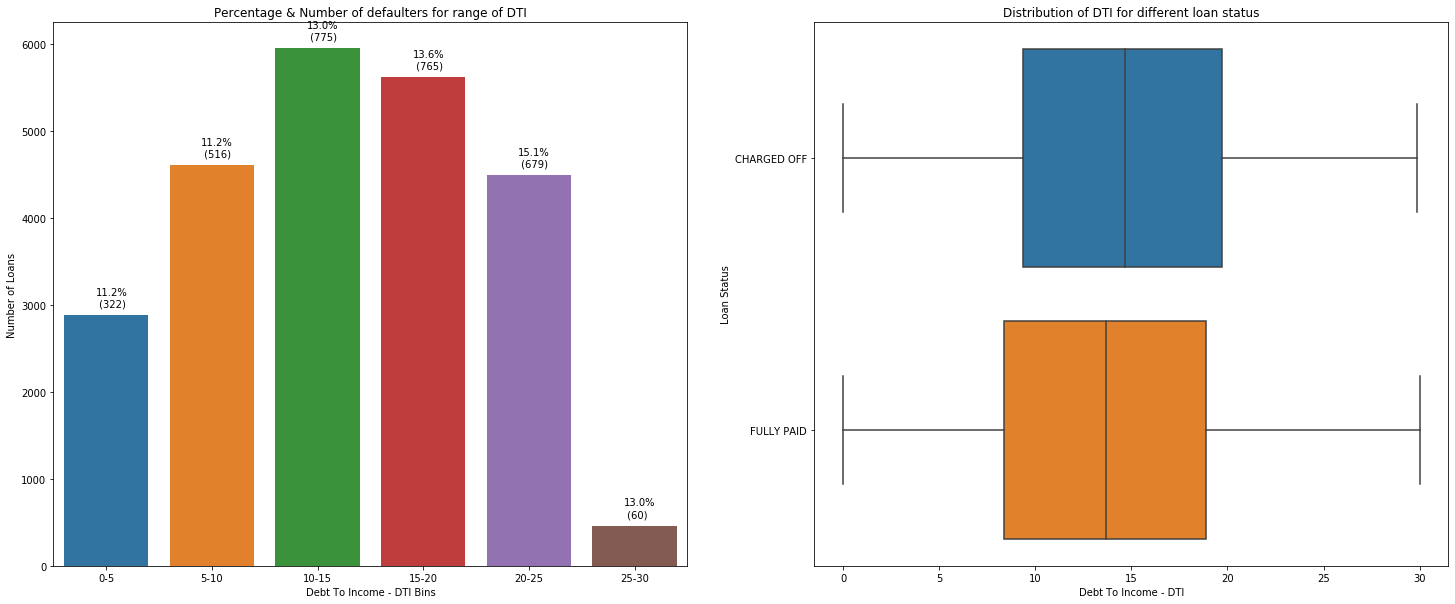

In [71]:
# Plotting a bar and box plot, to understand if DTI is a driving factor to default
plt.figure(figsize = (25,10))
plt.subplot(1, 2, 1)
ax = defaulters_plot_x('dti_bin', 'Percentage & Number of defaulters for range of DTI', ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30'], 'no', 0, 'Debt To Income - DTI Bins', 'Number of Loans', 0.5, 10*10)

plt.subplot(1, 2, 2)
ax = sns.boxplot(x = loans_data['dti'], y = loans_data['loan_status'])
plt.title('Distribution of DTI for different loan status')
plt.xlabel('Debt To Income - DTI')
plt.ylabel('Loan Status')
plt.show()

**Observation**: The DTI is the derived metric from annual income. DTI is directly proportional to probability of loan defaulting.
### <font color='red'>DTI</font> values are directly proportional to loan defaulting. The higher value of DTI, higher are the chances of Loan defaulting.
### Delinquency for 2 years:

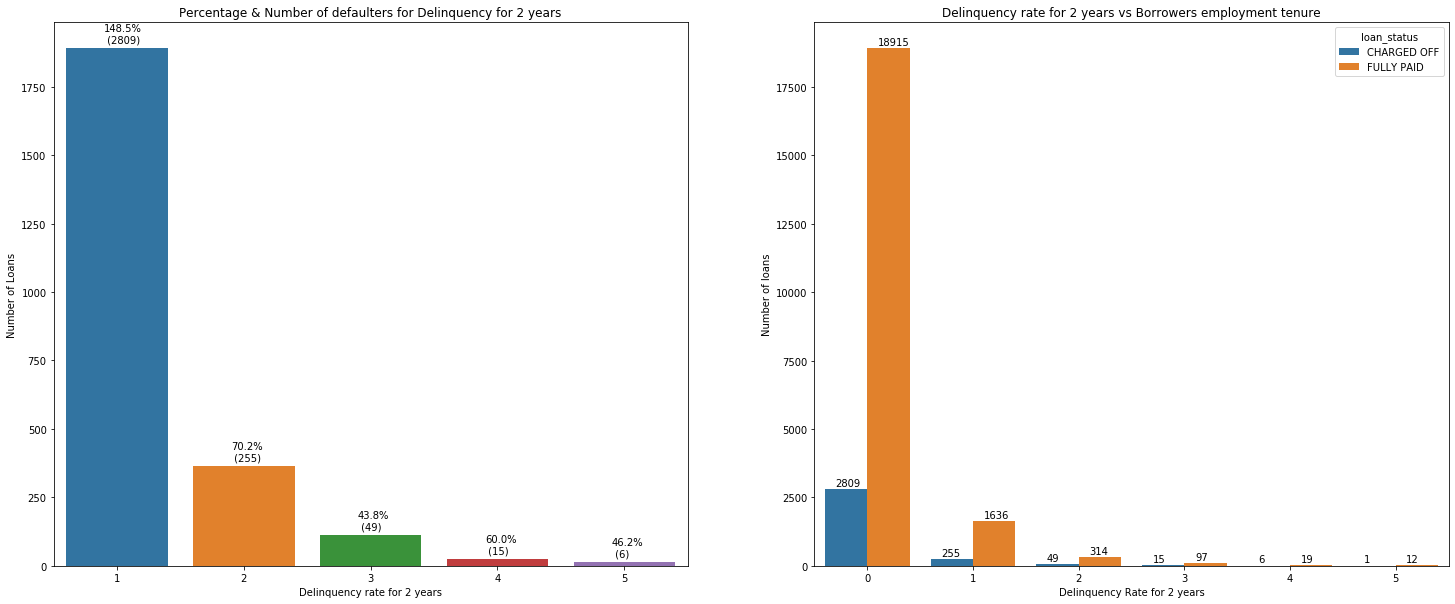

In [72]:
# Plotting a bar plot, to understand if delinquency parameter drives default of loan
plt.figure(figsize = (25, 10))
plt.subplot(1, 2, 1)
ax = defaulters_plot_x('delinq_2yrs', 'Percentage & Number of defaulters for Delinquency for 2 years', [1, 2, 3, 4, 5], 'no', 0, 'Delinquency rate for 2 years', 'Number of Loans', 0.5, 2*10)

plt.subplot(1, 2, 2)
ax = sns.barplot(x = 'delinq_2yrs', y = 'id', hue = 'loan_status', data = loans_data, estimator=lambda x: len(x), order = [0, 1, 2, 3, 4, 5])
plt.title('Delinquency rate for 2 years vs Borrowers employment tenure')
plt.xlabel('Delinquency Rate for 2 years')
plt.ylabel('Number of loans')
annotate_count_plot_x(ax,'delinq_2yrs', 0.3, 12*10)
plt.show()

**Observation**: The Delinquency rate is the derived metric from past installment amount and inquiries. Deliquency is directly proportional to probability of loan defaulting. But when observed from the above stats, percentage of defaulting is more when the past 30+ due amount times is less. Interesting!
### Revolving Line Utilization Rate:

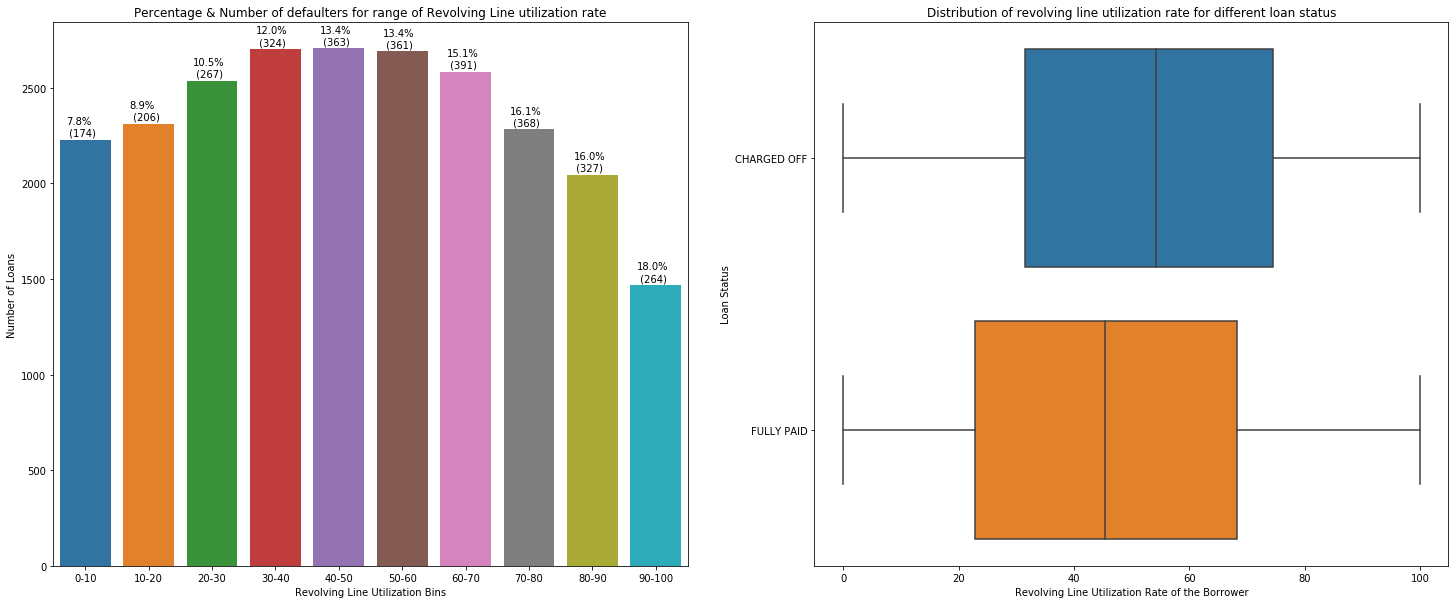

In [73]:
# Plotting a bar and box plot, to understand if Revolving Line utilization rate is a driving factor to default
plt.figure(figsize = (25,10))
plt.subplot(1, 2, 1)
ax = defaulters_plot_x('revol_util_bin', 'Percentage & Number of defaulters for range of Revolving Line utilization rate', ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'], 'no', 0, 'Revolving Line Utilization Bins', 'Number of Loans', 0.7, 2*10)

plt.subplot(1, 2, 2)
ax = sns.boxplot(x = loans_data['revol_util'], y = loans_data['loan_status'])
plt.title('Distribution of revolving line utilization rate for different loan status')
plt.xlabel('Revolving Line Utilization Rate of the Borrower')
plt.ylabel('Loan Status')
plt.show()

**Observation**: A good revolving line utilization rate is less than 30-40. We can also observe that the percentage of defaulters are increasing with the increase of revolving utilization.
### <font color='red'>REVOLVING LINE UTILIZATION RATE</font> is an important driver for loan defaulting. Borrowers with high Revolving line utilization rate are more likely to be defaulters.
### Total number of credit lines in the borrower's credit file:

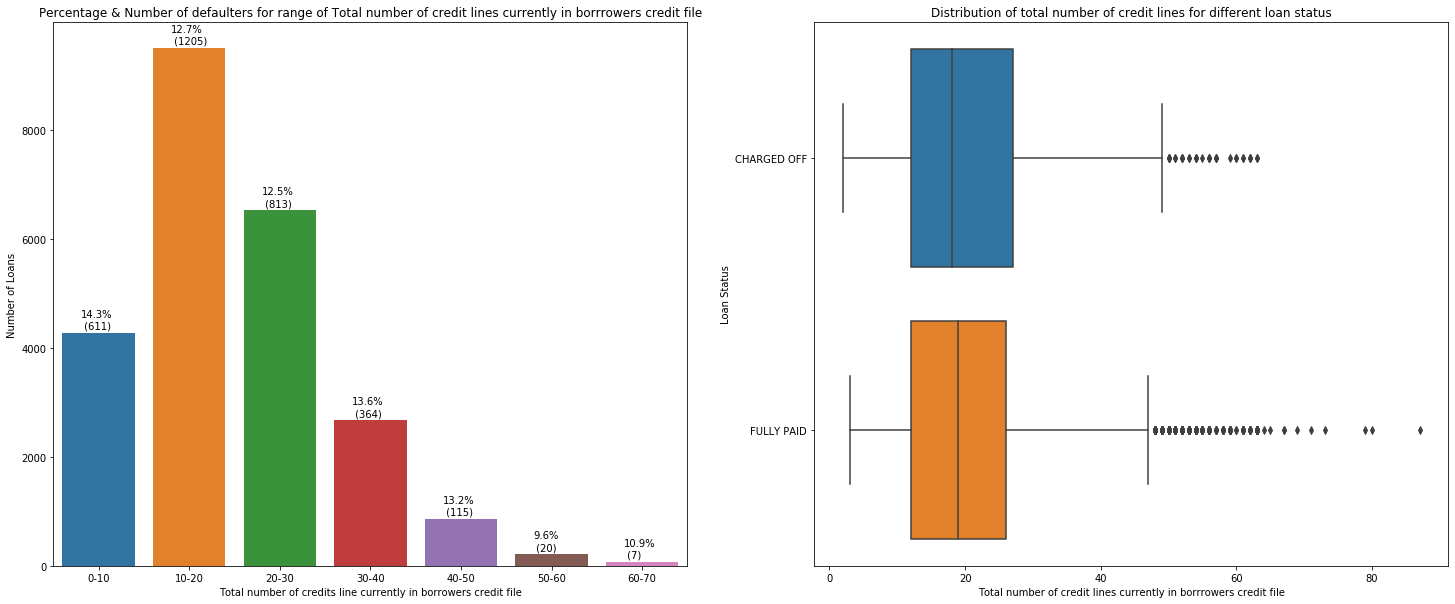

In [74]:
# Plotting a bar and box plot, to understand if total number of credit lines is a driving factor to default
plt.figure(figsize = (25,10))
plt.subplot(1, 2, 1)
ax = defaulters_plot_x('total_acc_bin', 'Percentage & Number of defaulters for range of Total number of credit lines currently in borrrowers credit file', ['0-10','10-20','20-30','30-40','40-50','50-60','60-70'], 'no', 0, 'Total number of credits line currently in borrowers credit file', 'Number of Loans', 0.6, 8*10)

plt.subplot(1, 2, 2)
ax = sns.boxplot(x = loans_data['total_acc'], y = loans_data['loan_status'])
plt.title('Distribution of total number of credit lines for different loan status')
plt.xlabel('Total number of credit lines currently in borrrowers credit file')
plt.ylabel('Loan Status')
plt.show()

**Observation**: There is **no** much difference with the values on total number of credit lines currently in borrowers credit file on the loan status.
### Open credit lines in the borrower's credit file:

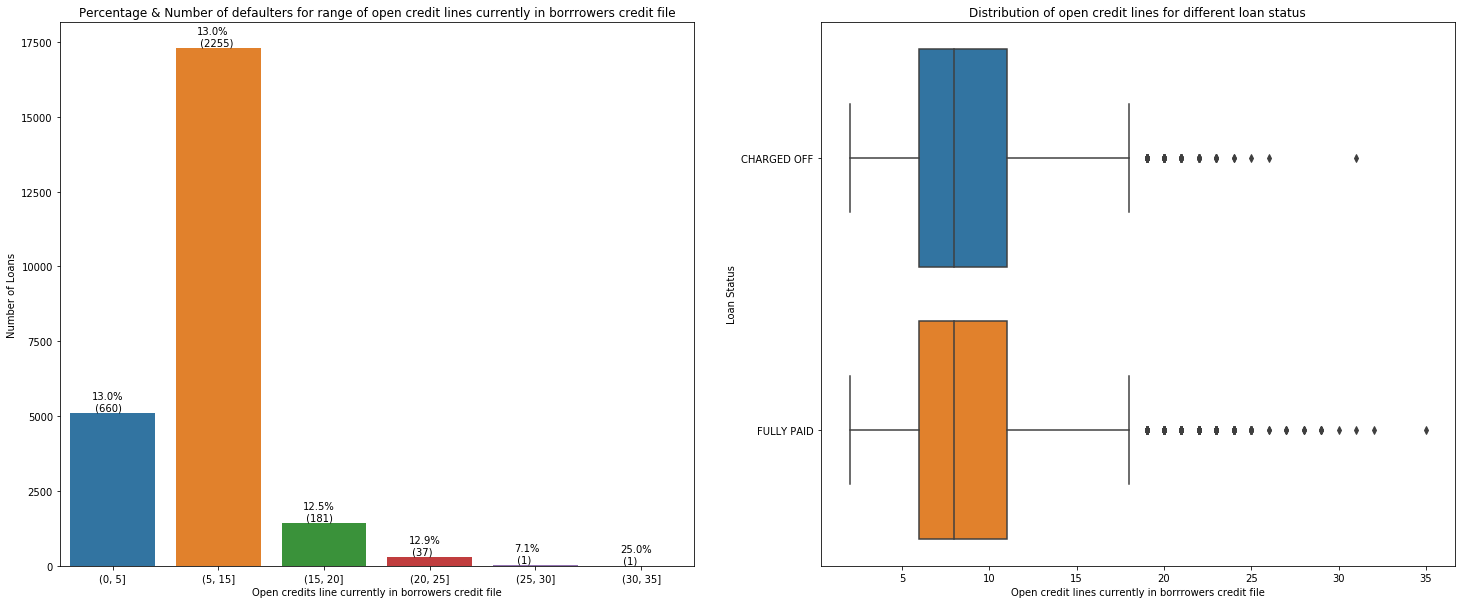

In [75]:
# Plotting a bar and box plot, to understand if open number of credit lines is a driving factor to default
plt.figure(figsize = (25,10))
plt.subplot(1, 2, 1)
ax = defaulters_plot_x('open_acc_bin', 'Percentage & Number of defaulters for range of open credit lines currently in borrrowers credit file', [], 'sort_order', 0, 'Open credits line currently in borrowers credit file', 'Number of Loans', 0.6, 8*10)

plt.subplot(1, 2, 2)
ax = sns.boxplot(x = loans_data['open_acc'], y = loans_data['loan_status'])
plt.title('Distribution of open credit lines for different loan status')
plt.xlabel('Open credit lines currently in borrrowers credit file')
plt.ylabel('Loan Status')
plt.show()

**Observation**: There is **no** much difference with the values on open number of credit lines currently in borrowers credit file on the loan status.
### Analyzing the correlation between numeric parameters:

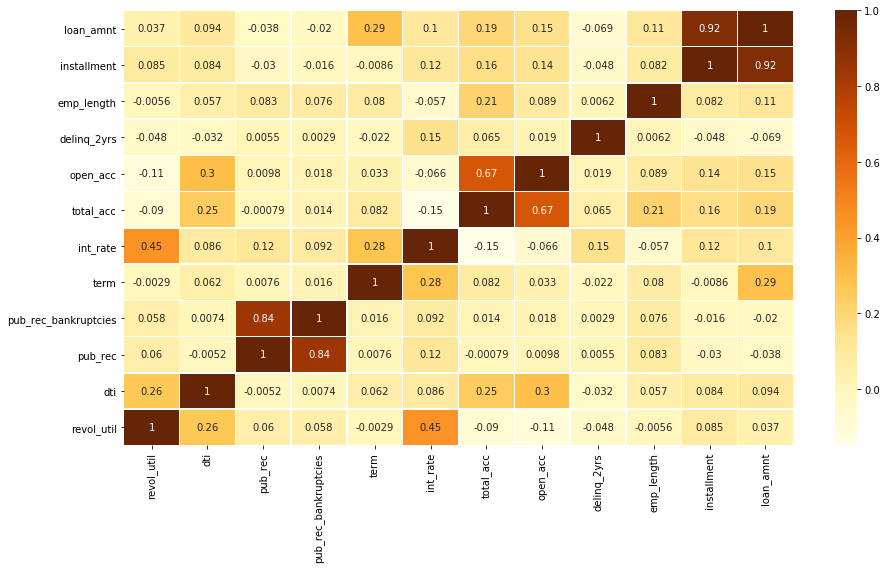

In [76]:
# Plotting a heat map of the analyzed attributes
columns_to_keep = ['revol_util', 'dti', 'pub_rec', 'pub_rec_bankruptcies', 'term', 'int_rate', 'total_acc', 'open_acc', 'delinq_2yrs', 'emp_length', 'month', 'installment', 'home_ownership', 'loan_amnt', 'grade', 'purpose']
plot_df = loans_data[columns_to_keep]
plt.figure(figsize = (15,8))
ax = sns.heatmap(plot_df.corr(), annot = True, linewidth = 0.5, cmap = "YlOrBr")
t, bot = ax.get_ylim()
ax.set_ylim(top = t + 0.5, bottom = bot - 0.5)
plt.show()

**Observations**:
 - Public derogatory records & Public records of bankruptcies, Total number of credit lines & Open credit lines, Loan amount & Installment amount are highly positively correlated, which is highly relatable.
 
 
 - Interest Rate & Revolving Line utilization rate are fairly positively correlated. As the Interest Rate increased for more defaulters, the revolving line utilization rate also increases.
 
 
 - Interest Rate & Total number of credit lines are highly negatively correlated.

## Summary:
### Below are some of the observations made on the attributes which drive the loan defaulting:
 - <font color='green'>**GRADE OF THE BORROWER**</font> : If the borrower has a lesser grade **(i.e, less than B grade - C, D, E, F)** is more likely to be a defaulter.
 
 
 - <font color='green'>**INTEREST RATE**</font> : Loans with higher interest rate **(greater than ~ 11-12%)** are more likely to be defaulted.
 
 
 - <font color='green'>**LOAN TERM/TENURE**</font> : **60 months** tenure loans are highly to be defaulted.
 
 
 - <font color='green'>**DEBT TO INCOME**</font> : The higher value of DTI **(> 10)**, higher are the chances of Loan defaulting.
 
 
 - <font color='green'>**REVOLVING LINE UTLIZATION RATE**</font> : Borrowers with high Revolving line utilization rate **(> 30)** are more likely to be defaulters.
 
 
 - <font color='green'>**LOAN ISSUING MONTH**</font> : Loans issued at the ending months of the year **(generally post August)** have higher chances to be defaulted.
 
 
 - <font color='green'>**PUBLIC DEROGATORY RECORDS**</font> : Borrowers with high number of public derogatory records **(More than 1)** are more likely to be defaulters.
 
 
 - <font color='green'>**PUBLIC RECORDS OF BANKRUPTCIES**</font> : Borrowers with high number of public records of bankruptcies **(More than 1)** are more likely to be defaulters.
 
 
 - <font color='green'>**LOAN PURPOSE**</font> : Loans borrowed for **'Small Business, Renewable energy, Vacation'** purpose might turn out to be defaulted.
  
  
 - <font color='green'>**BORROWER HOME OWNERSHIP**</font> : Borrower's who **do not own a house** will most likely turn out to be defaulters.